<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### PORTO

Olah data porto

## DATA UNDERSTANDING

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('student dropout.csv')
df

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,False
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,False
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,True
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

### Deteksi Outliers

In [4]:
# Mengabaikan kolom dengan tipe 'object' dan 'boolean'
q1 = df.select_dtypes(exclude=['object', 'bool']).quantile(0.25)
q3 = df.select_dtypes(exclude=['object', 'bool']).quantile(0.75)
iqr = q3 - q1


In [5]:
# Melihat batas bawah/minimum dari Interquartile Range (IQR)
batas_bawah = q1 - 1.5 * iqr
batas_bawah

Age                            13.0
Mother_Education               -1.0
Father_Education               -2.0
Travel_Time                    -0.5
Study_Time                     -0.5
Number_of_Failures              0.0
Family_Relationship             2.5
Free_Time                       1.5
Going_Out                      -1.0
Weekend_Alcohol_Consumption    -0.5
Weekday_Alcohol_Consumption    -2.0
Health_Status                  -2.5
Number_of_Absences             -9.0
Grade_1                         5.5
Grade_2                         5.5
Final_Grade                     4.0
dtype: float64

In [6]:
# Melihat batas atas/maksimum dari Interquartile Range (IQR)
batas_atas = q3 + (1.5 * iqr)
batas_atas

Age                            21.0
Mother_Education                7.0
Father_Education                6.0
Travel_Time                     3.5
Study_Time                      3.5
Number_of_Failures              0.0
Family_Relationship             6.5
Free_Time                       5.5
Going_Out                       7.0
Weekend_Alcohol_Consumption     3.5
Weekday_Alcohol_Consumption     6.0
Health_Status                   9.5
Number_of_Absences             15.0
Grade_1                        17.5
Grade_2                        17.5
Final_Grade                    20.0
dtype: float64

In [7]:
# Menampung kolom dengan tipe data selain object
df_ex_object = df.select_dtypes(exclude=['object', 'bool'])

# Filter outlier pada dataset dengan batas bawah dan atas
outlier_filter = ((df_ex_object < q1 - 1.5 * iqr) | (df_ex_object > q3 + (1.5 * iqr)))
outlier_filter

,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
646,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
647,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [8]:
for col in outlier_filter.columns:
    # Exclude kolom dengan tipe data object
    if df[col].dtype != object:
        print(f"Nama Kolom: {col}")
        value_counts = outlier_filter[col].value_counts()
        for value, count in value_counts.items():
            print(f"  Nilai: {value}, Jumlah: {count}")
        print('-' * 30)

Nama Kolom: Age
  Nilai: False, Jumlah: 648
  Nilai: True, Jumlah: 1
------------------------------
Nama Kolom: Mother_Education
  Nilai: False, Jumlah: 649
------------------------------
Nama Kolom: Father_Education
  Nilai: False, Jumlah: 649
------------------------------
Nama Kolom: Travel_Time
  Nilai: False, Jumlah: 633
  Nilai: True, Jumlah: 16
------------------------------
Nama Kolom: Study_Time
  Nilai: False, Jumlah: 614
  Nilai: True, Jumlah: 35
------------------------------
Nama Kolom: Number_of_Failures
  Nilai: False, Jumlah: 549
  Nilai: True, Jumlah: 100
------------------------------
Nama Kolom: Family_Relationship
  Nilai: False, Jumlah: 598
  Nilai: True, Jumlah: 51
------------------------------
Nama Kolom: Free_Time
  Nilai: False, Jumlah: 604
  Nilai: True, Jumlah: 45
------------------------------
Nama Kolom: Going_Out
  Nilai: False, Jumlah: 649
------------------------------
Nama Kolom: Weekend_Alcohol_Consumption
  Nilai: False, Jumlah: 615
  Nilai: True, Ju

In [9]:
# Daftar kolom yang memiliki outlier
columns_with_outliers = ['Age', 'Travel_Time', 'Study_Time', 'Number_of_Failures', 'Family_Relationship',
                         'Free_Time', 'Weekend_Alcohol_Consumption', 'Number_of_Absences', 'Grade_1', 
                         'Grade_2', 'Final_Grade']

# Menghitung persentase outlier untuk setiap kolom
outlier_percentages = {}
for column in columns_with_outliers:
    outlier_percentages[column] = len(outlier_filter[outlier_filter[column] == True]) / len(df[column]) * 100

# Menampilkan hasil
outlier_percentages


{'Age': 0.15408320493066258,
 'Travel_Time': 2.465331278890601,
 'Study_Time': 5.3929121725731894,
 'Number_of_Failures': 15.408320493066254,
 'Family_Relationship': 7.858243451463791,
 'Free_Time': 6.933744221879815,
 'Weekend_Alcohol_Consumption': 5.238828967642527,
 'Number_of_Absences': 3.2357473035439135,
 'Grade_1': 2.465331278890601,
 'Grade_2': 3.8520801232665636,
 'Final_Grade': 2.465331278890601}

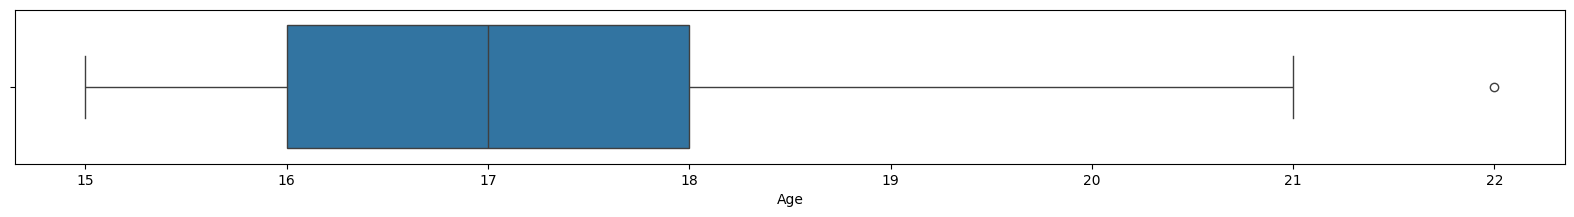

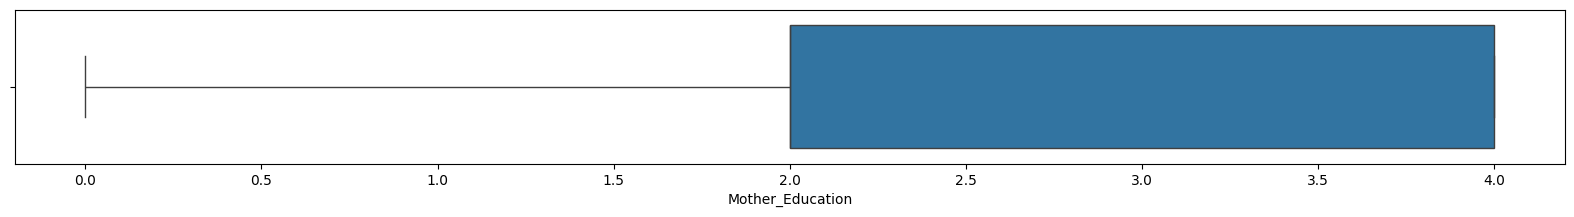

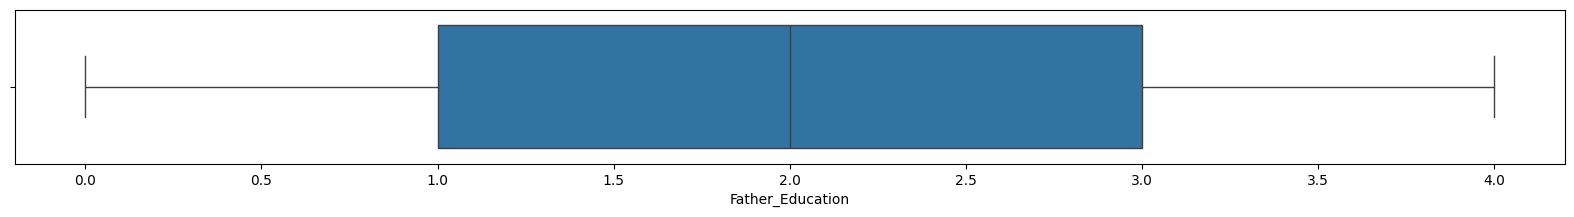

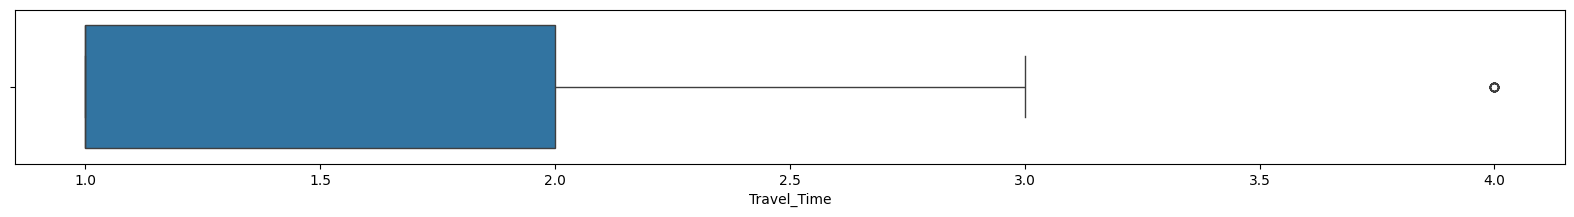

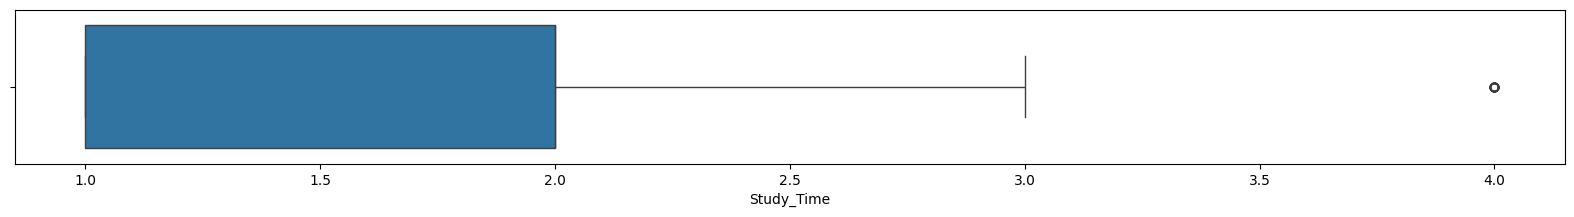

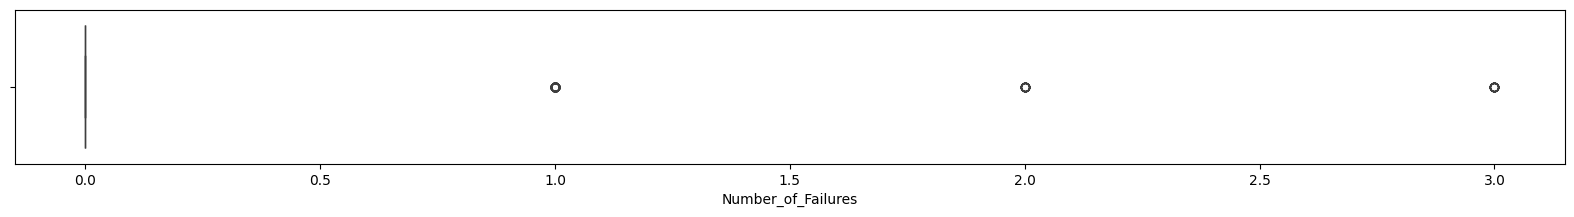

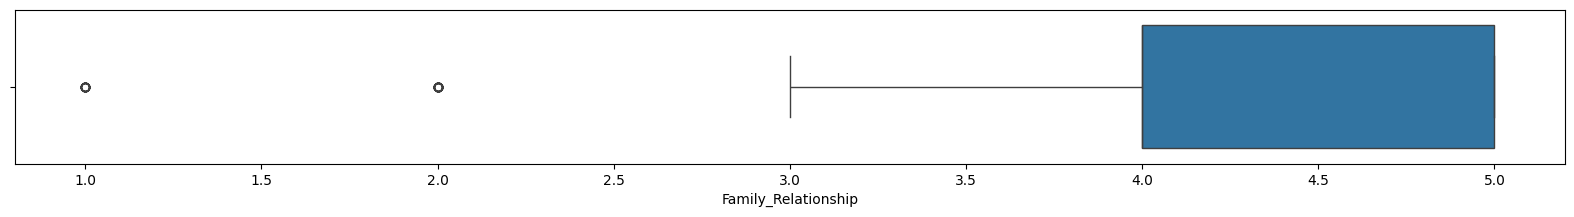

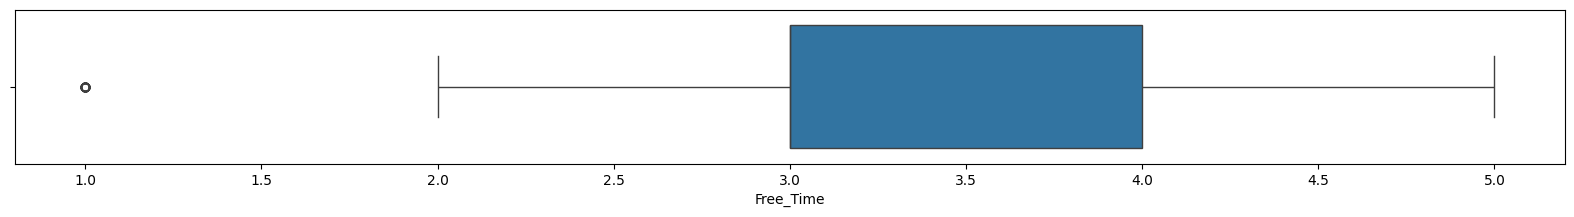

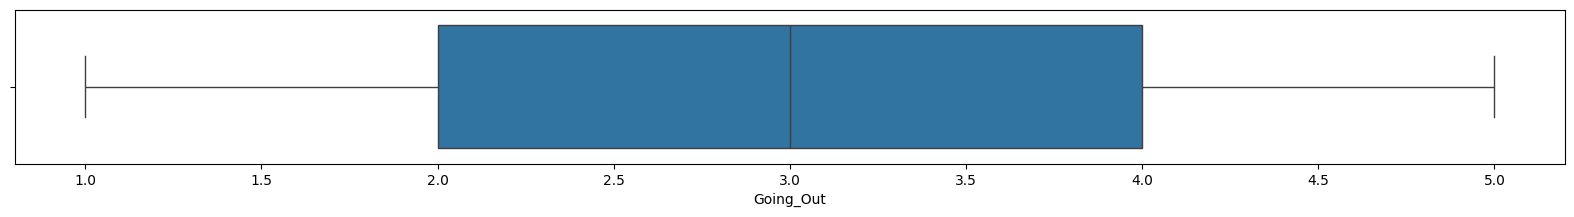

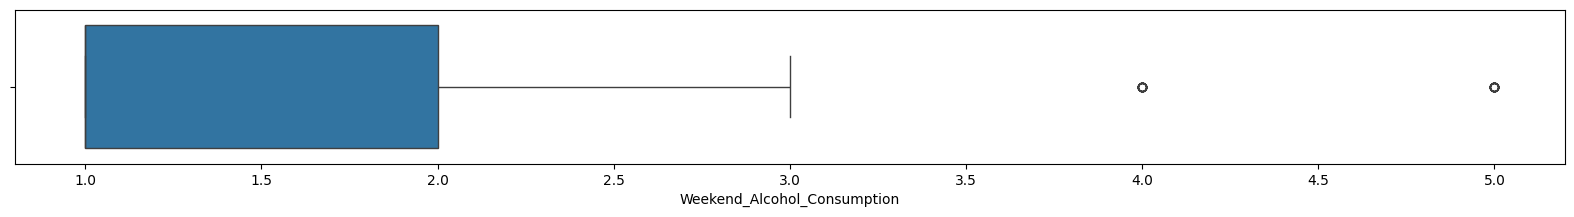

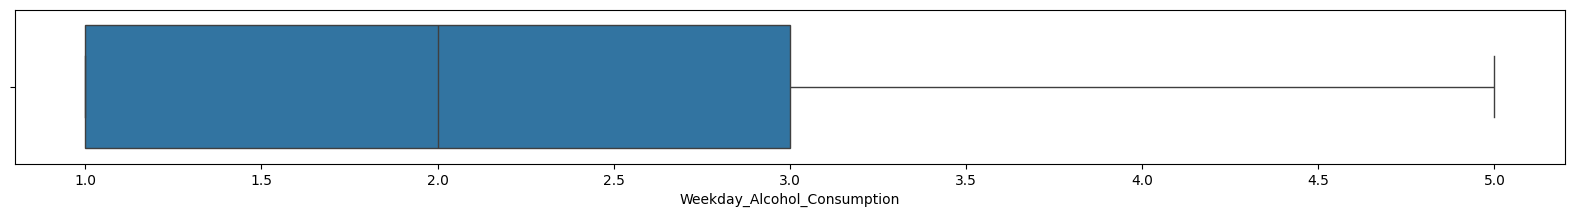

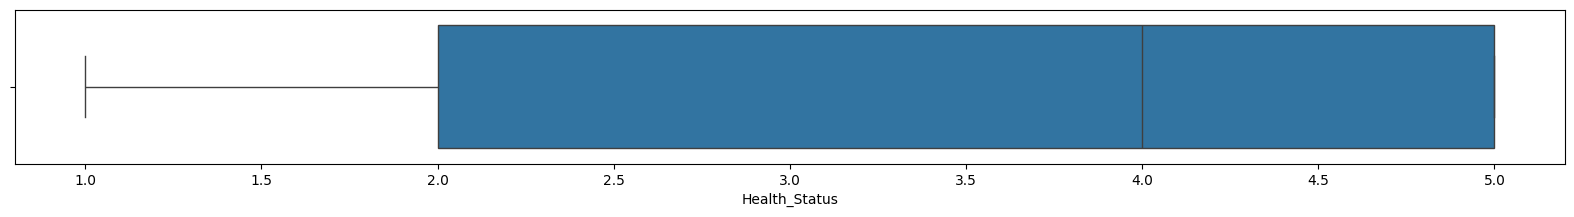

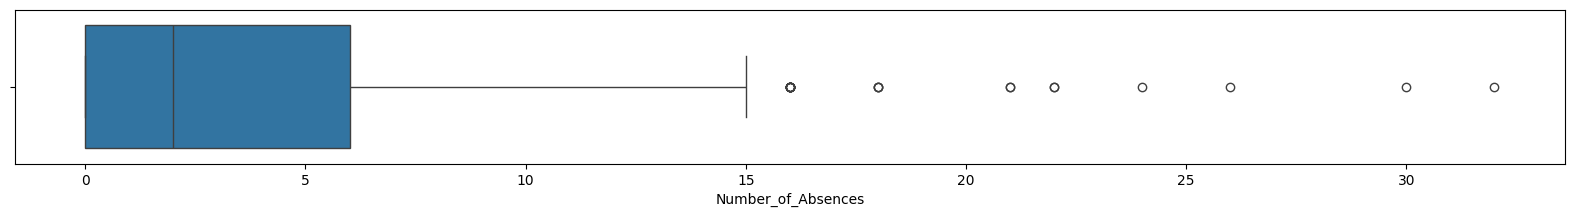

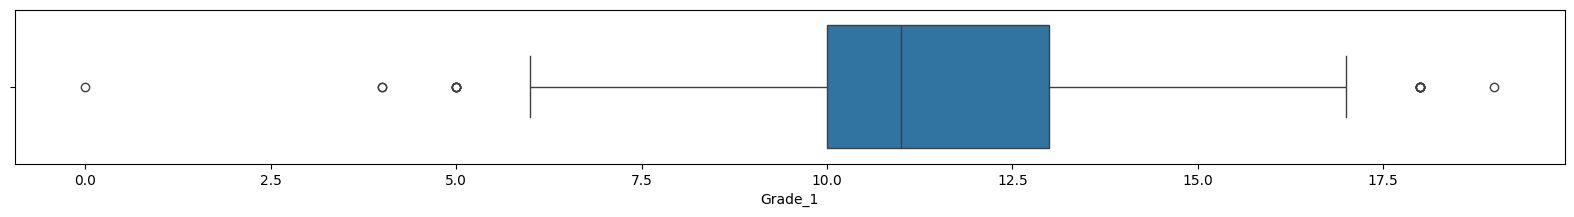

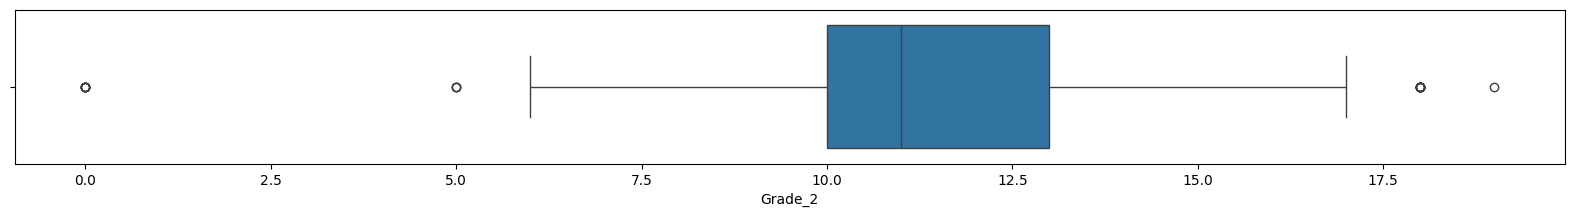

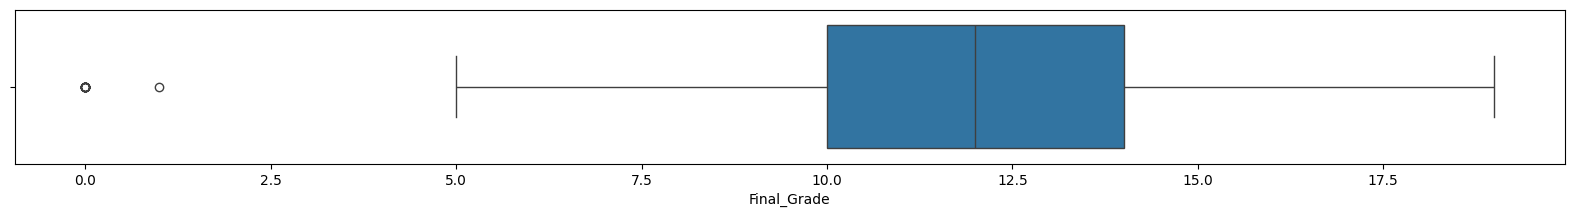

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mencari Outliers - Boxplot

# Exclude tipe data object
df_outlier = df.select_dtypes(exclude = ['object', 'bool'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

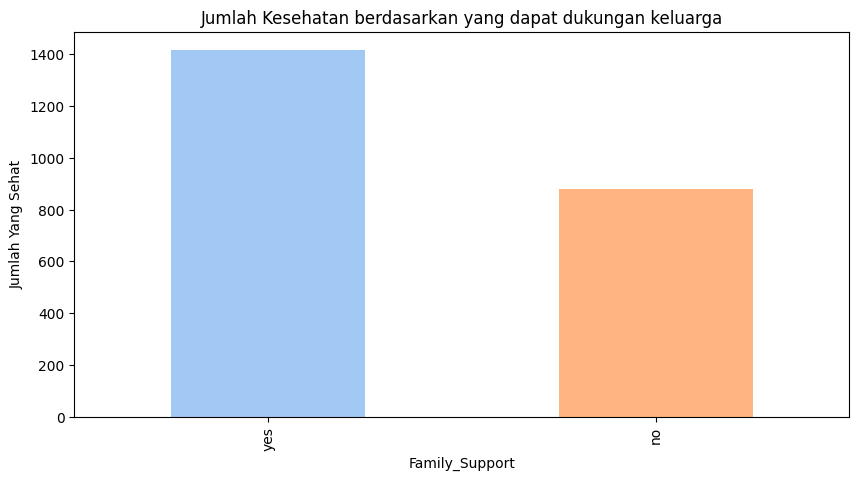

In [11]:
# Analisa jumlah delay masing-masing maskapai

# Menjumlahkan nilai dalam kolom 'Class' untuk setiap kelompok maskapai penerbangan, dan mengurutkan maskapai berdasarkan jumlah nilai 'Class' secara menurun.
FamilySupport_Count = df.groupby('Family_Support').sum()['Health_Status'].sort_values(ascending=False)

plt.figure(figsize=(10,5))

myColors = sns.color_palette('pastel')[0:5]
FamilySupport_Count.plot(kind='bar',color= myColors)
plt.ylabel('Jumlah Yang Sehat')
plt.title('Jumlah Kesehatan berdasarkan yang dapat dukungan keluarga')
plt.show()

/tmp/ipykernel_1941839/1386707834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factors['Family_Support'] = df_factors['Family_Support'].map({'yes': 1, 'no': 0})
/tmp/ipykernel_1941839/1386707834.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factors['Extra_Curricular_Activities'] = df_factors['Extra_Curricular_Activities'].map({'yes': 1, 'no': 0})


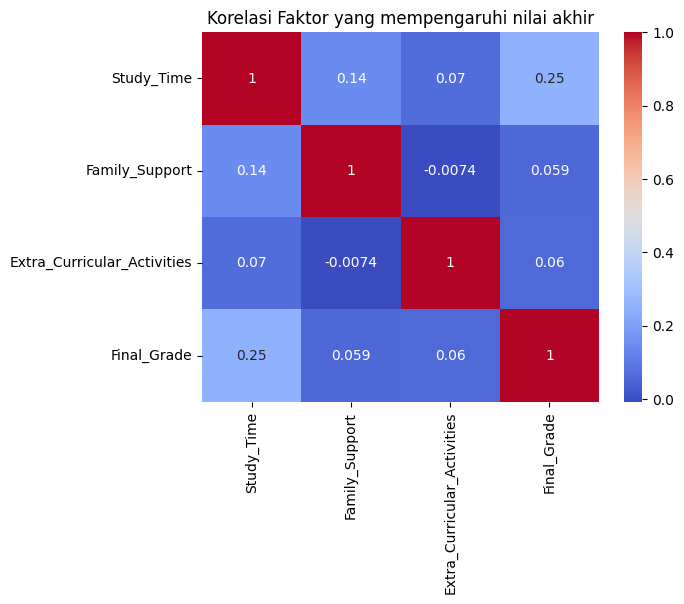

In [12]:
# Pilih kolom yang relevan
factors = ['Study_Time', 'Family_Support', 'Extra_Curricular_Activities', 'Final_Grade']
df_factors = df[factors]

# Encode kolom kategori
df_factors['Family_Support'] = df_factors['Family_Support'].map({'yes': 1, 'no': 0})
df_factors['Extra_Curricular_Activities'] = df_factors['Extra_Curricular_Activities'].map({'yes': 1, 'no': 0})

# Visualisasi korelasi
sns.heatmap(df_factors.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Faktor yang mempengaruhi nilai akhir')
plt.show()

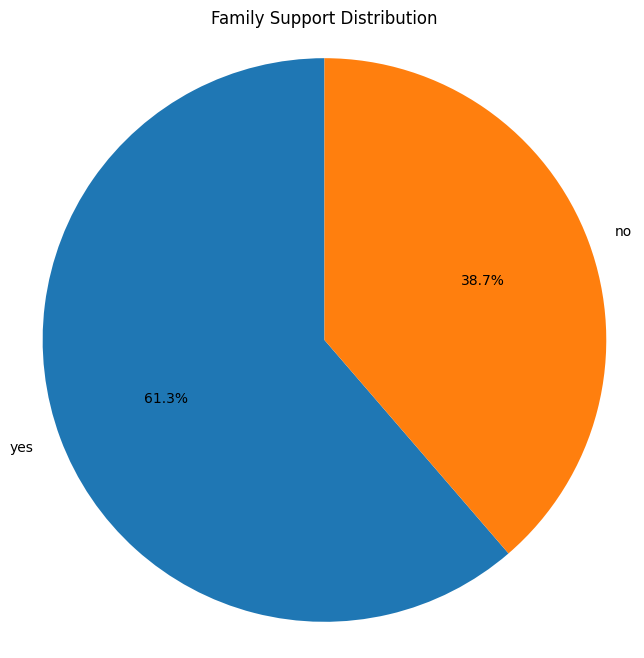

In [13]:
# Pie chart untuk dukungan keluarga
family_support_counts = df['Family_Support'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(family_support_counts, labels=family_support_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Family Support Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

## DATA PREPARATION

In [14]:
# Menghitung nilai data yang kosong
df.isna().sum()

School                         0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Guardian                       0
Travel_Time                    0
Study_Time                     0
Number_of_Failures             0
School_Support                 0
Family_Support                 0
Extra_Paid_Class               0
Extra_Curricular_Activities    0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
In_Relationship                0
Family_Relationship            0
Free_Time                      0
Going_Out                      0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Health_Status                  0
Number_of_Absences             0
Grade_1   

### Handling Outlier

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

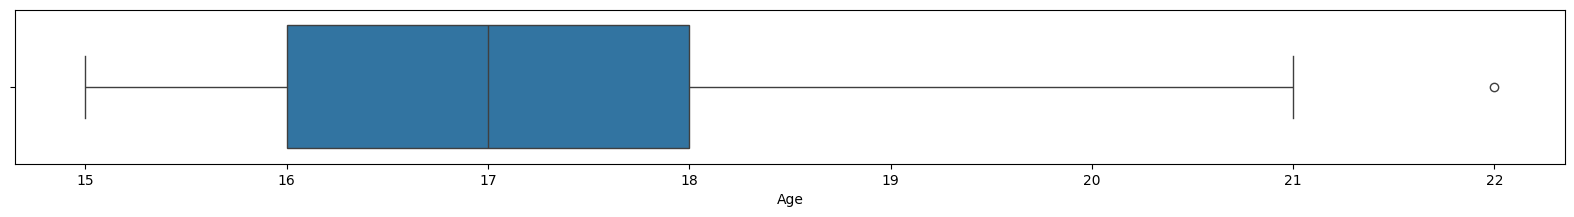

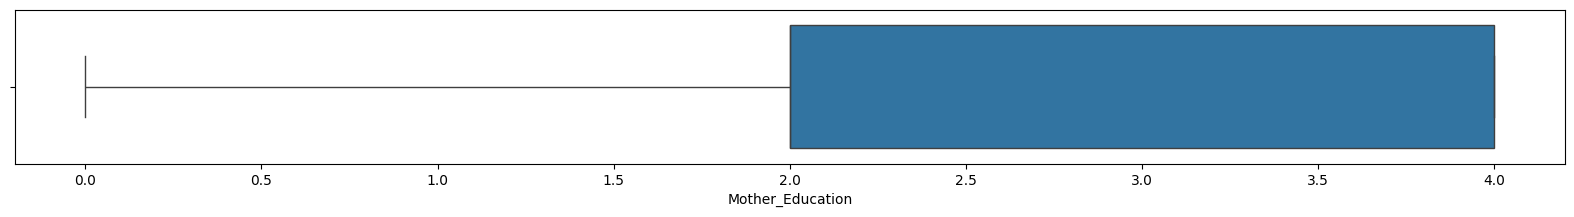

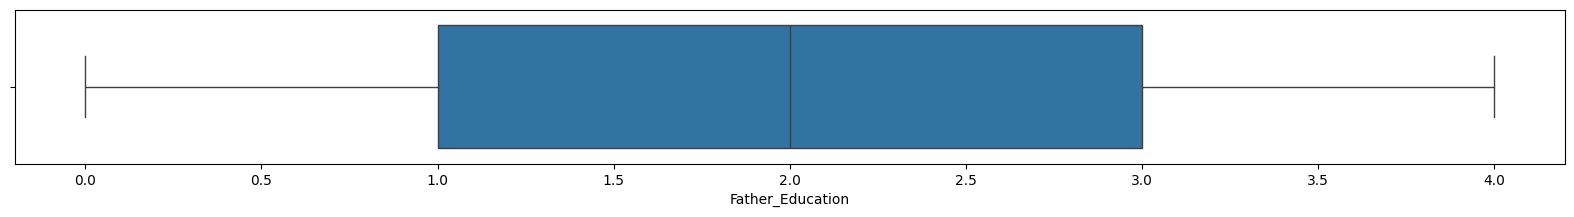

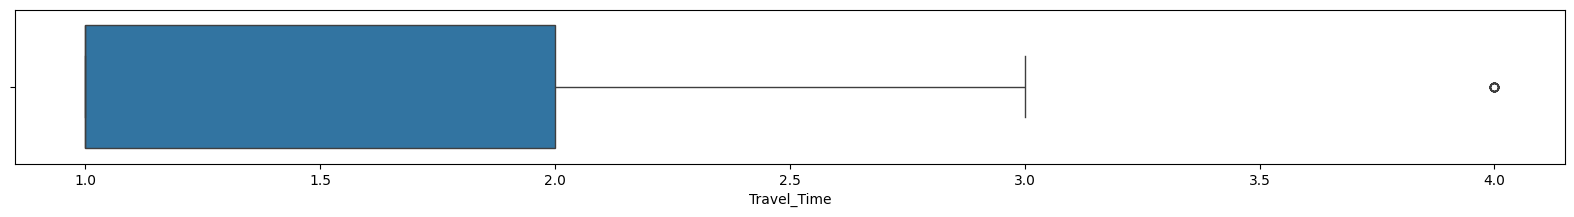

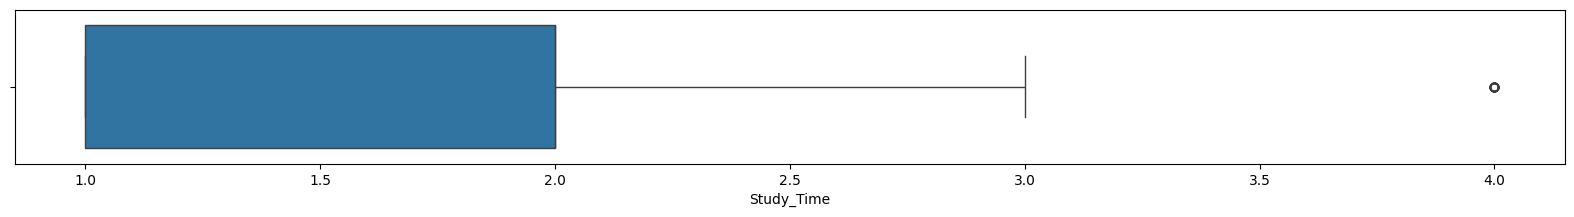

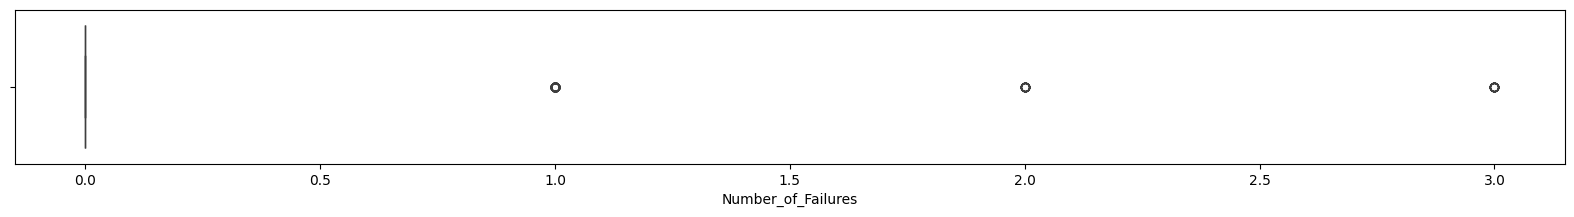

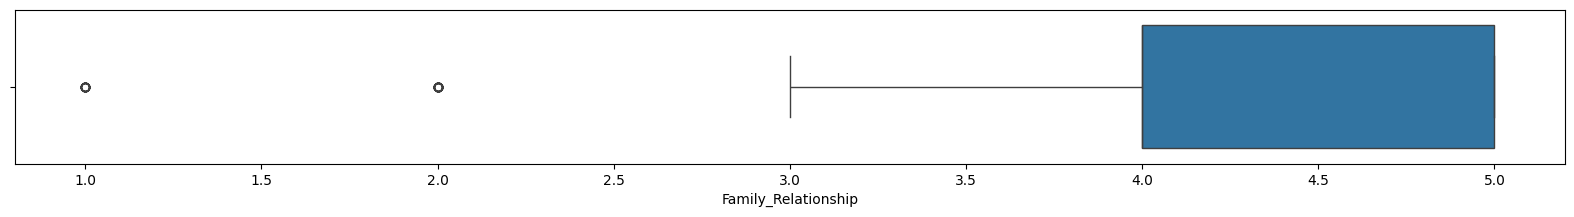

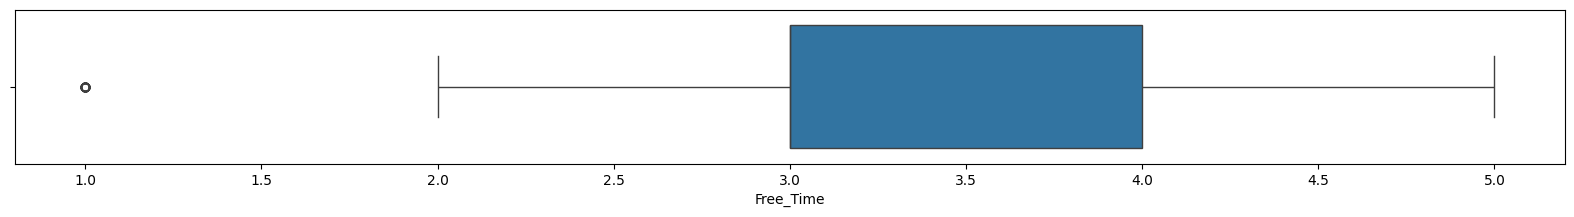

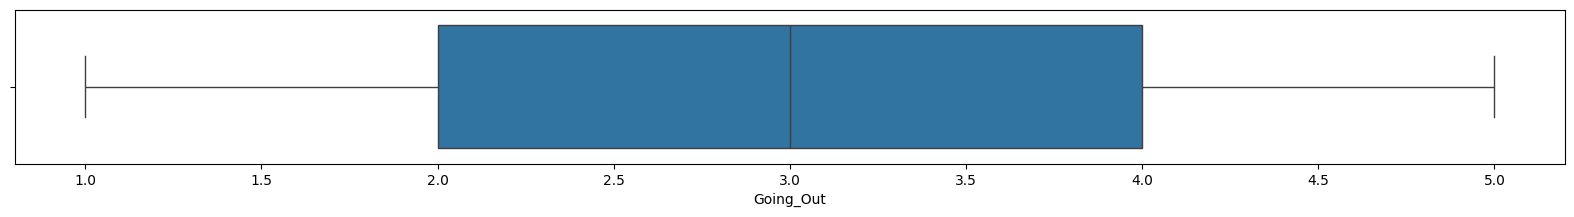

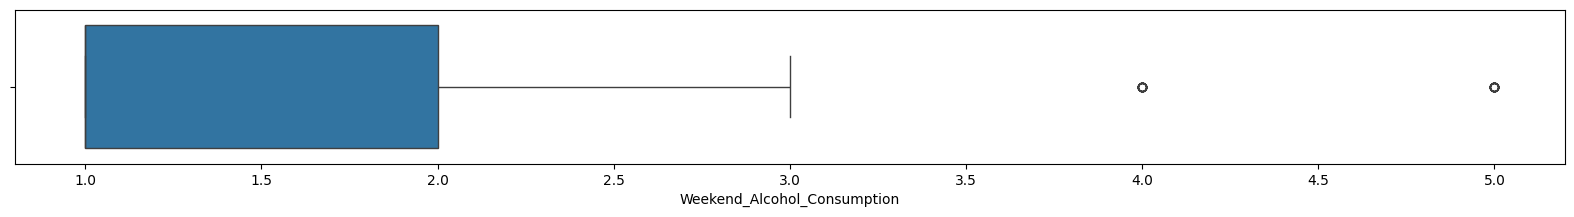

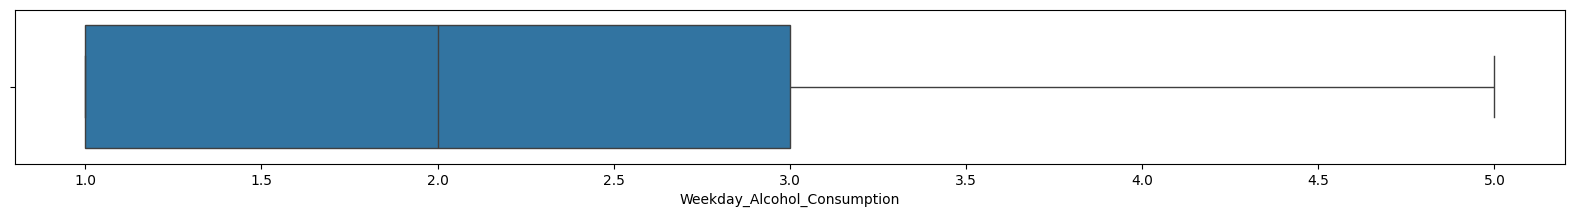

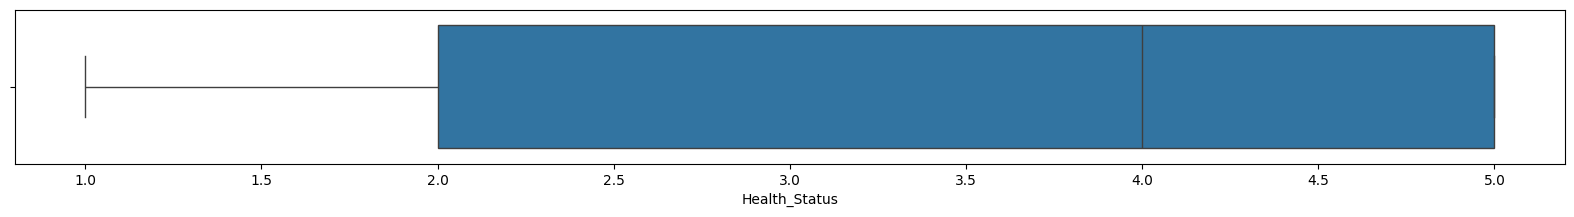

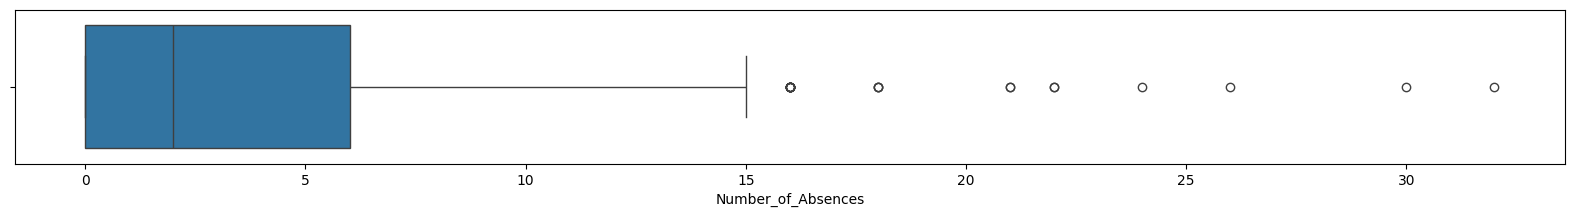

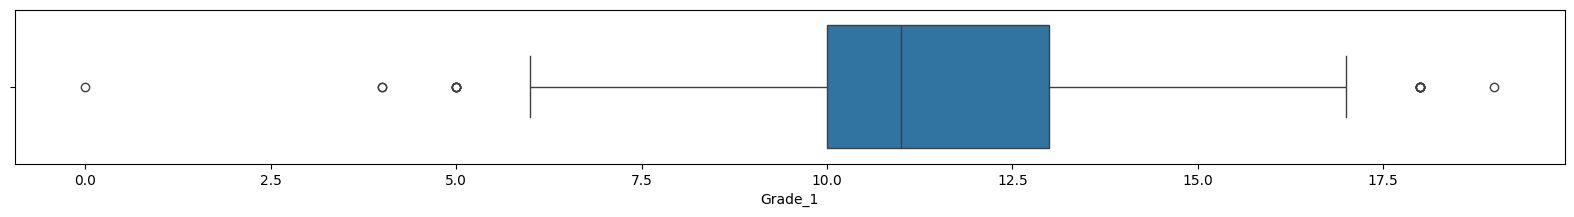

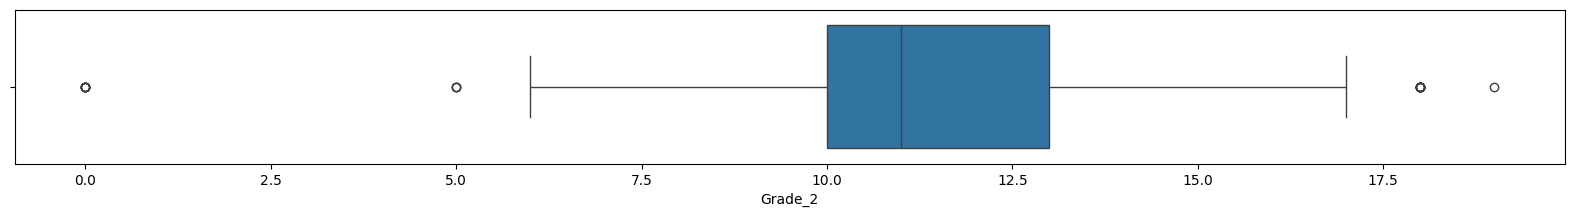

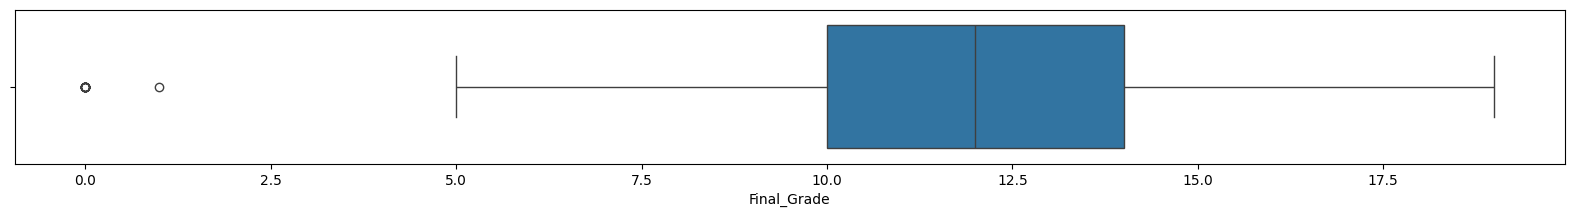

In [16]:
# Mencari Outliers - Boxplot
df_outlier = df.select_dtypes(exclude=['object','bool'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [17]:
#Menggunakan Teknik Trimming

In [18]:
df.dtypes

School                         object
Gender                         object
Age                             int64
Address                        object
Family_Size                    object
Parental_Status                object
Mother_Education                int64
Father_Education                int64
Mother_Job                     object
Father_Job                     object
Reason_for_Choosing_School     object
Guardian                       object
Travel_Time                     int64
Study_Time                      int64
Number_of_Failures              int64
School_Support                 object
Family_Support                 object
Extra_Paid_Class               object
Extra_Curricular_Activities    object
Attended_Nursery               object
Wants_Higher_Education         object
Internet_Access                object
In_Relationship                object
Family_Relationship             int64
Free_Time                       int64
Going_Out                       int64
Weekend_Alco

In [19]:
# Memilih kolom dengan tipe data selain object dan bool
df.select_dtypes(exclude=["object", "bool"]).head()

,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13


In [20]:
q1 = df.select_dtypes(exclude=["object", "bool"]).quantile(0.25)
q3 = df.select_dtypes(exclude=["object", "bool"]).quantile(0.75)
iqr = q3-q1
iqr

Age                            2.0
Mother_Education               2.0
Father_Education               2.0
Travel_Time                    1.0
Study_Time                     1.0
Number_of_Failures             0.0
Family_Relationship            1.0
Free_Time                      1.0
Going_Out                      2.0
Weekend_Alcohol_Consumption    1.0
Weekday_Alcohol_Consumption    2.0
Health_Status                  3.0
Number_of_Absences             6.0
Grade_1                        3.0
Grade_2                        3.0
Final_Grade                    4.0
dtype: float64

In [21]:
batas_atas = q3 + 1.5 * iqr
batas_atas

Age                            21.0
Mother_Education                7.0
Father_Education                6.0
Travel_Time                     3.5
Study_Time                      3.5
Number_of_Failures              0.0
Family_Relationship             6.5
Free_Time                       5.5
Going_Out                       7.0
Weekend_Alcohol_Consumption     3.5
Weekday_Alcohol_Consumption     6.0
Health_Status                   9.5
Number_of_Absences             15.0
Grade_1                        17.5
Grade_2                        17.5
Final_Grade                    20.0
dtype: float64

In [22]:
df_noid_outlier_clean = df[~((df.select_dtypes(exclude=["object", "bool"]) < q1 - 1.5 * iqr) | (df.select_dtypes(exclude=["object", "bool"]) > q3 + 1.5 * iqr)).any(axis=1)]

In [23]:
df_noid_outlier_clean.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,6,12,12,13,False


In [24]:
# Melihat ukuran baris dan kolom setelah dipangkas
df_noid_outlier_clean.shape

(393, 34)

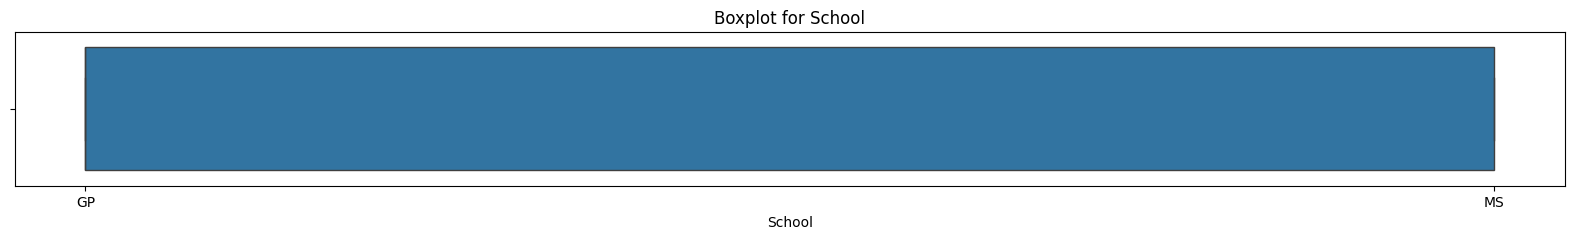

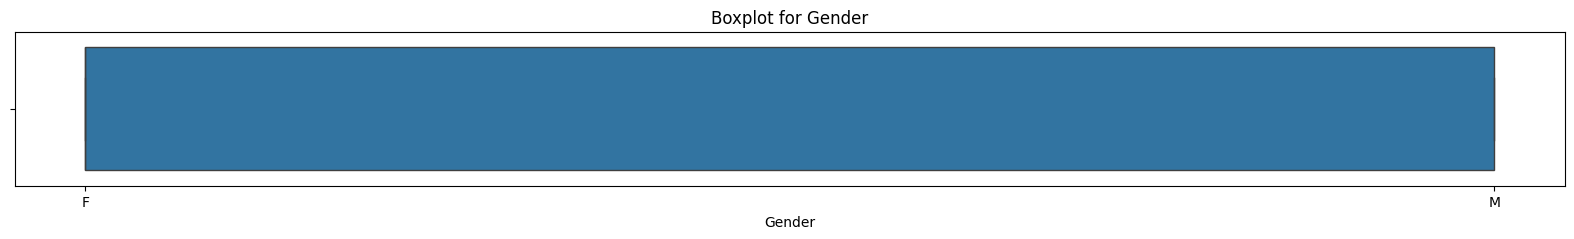

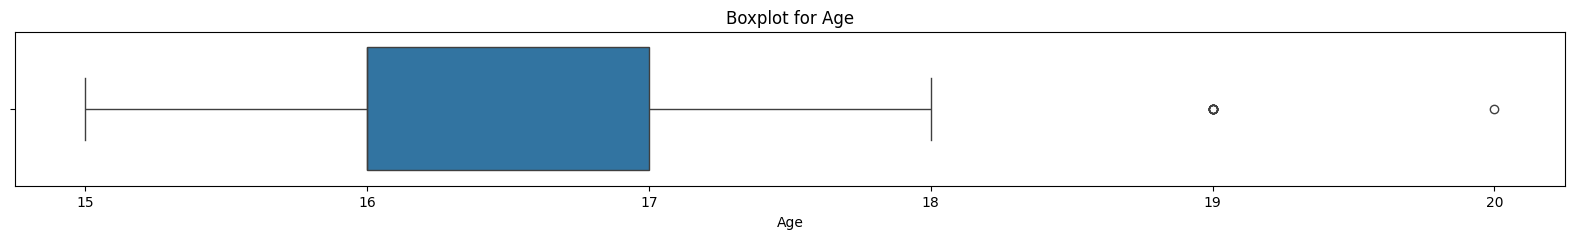

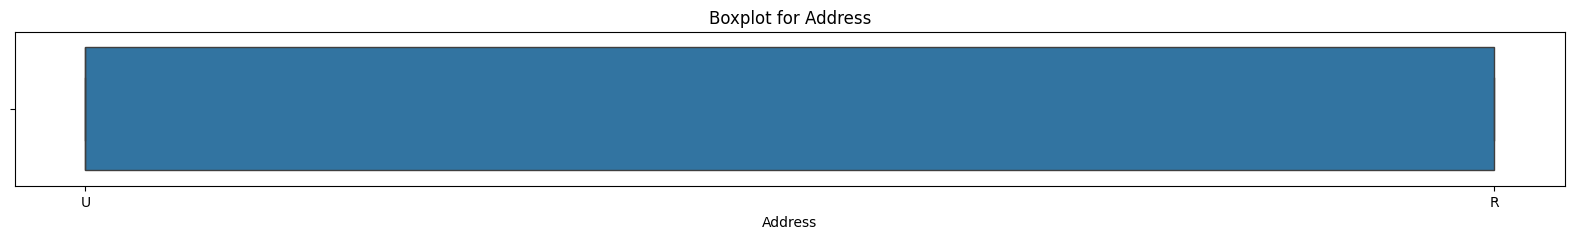

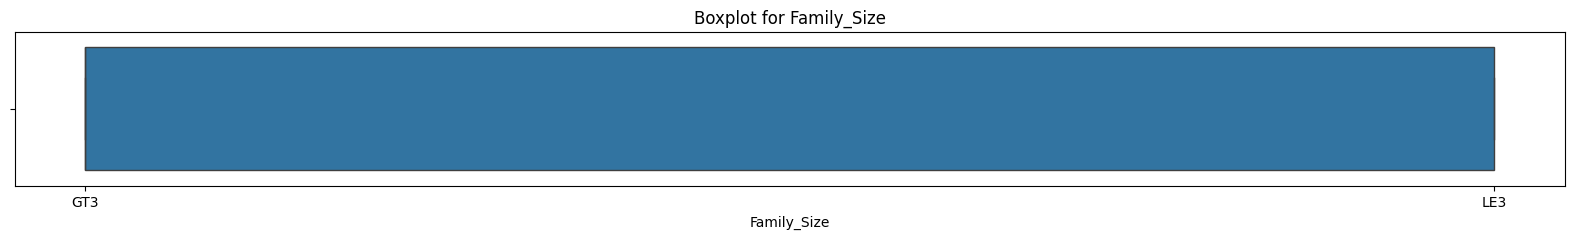

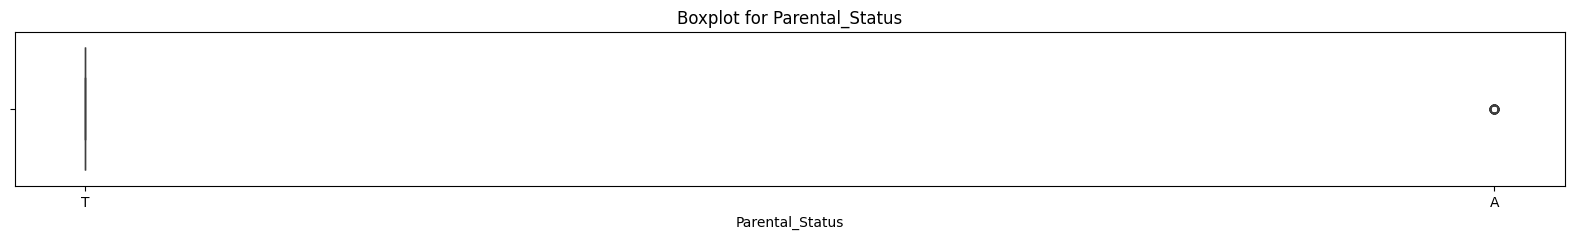

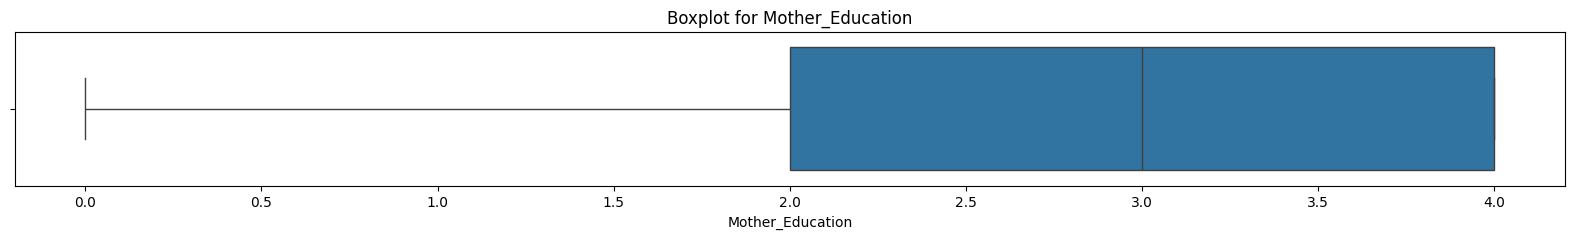

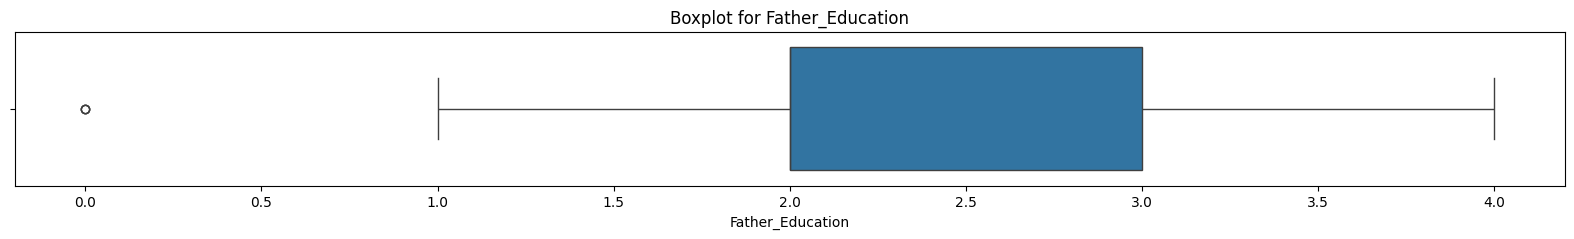

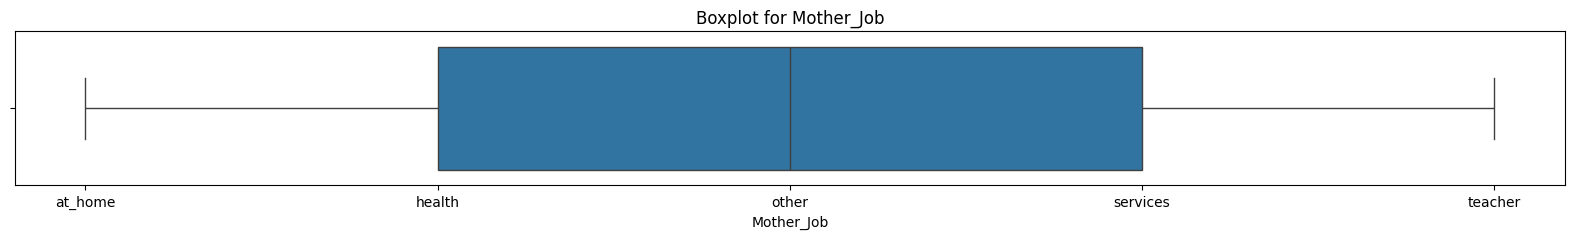

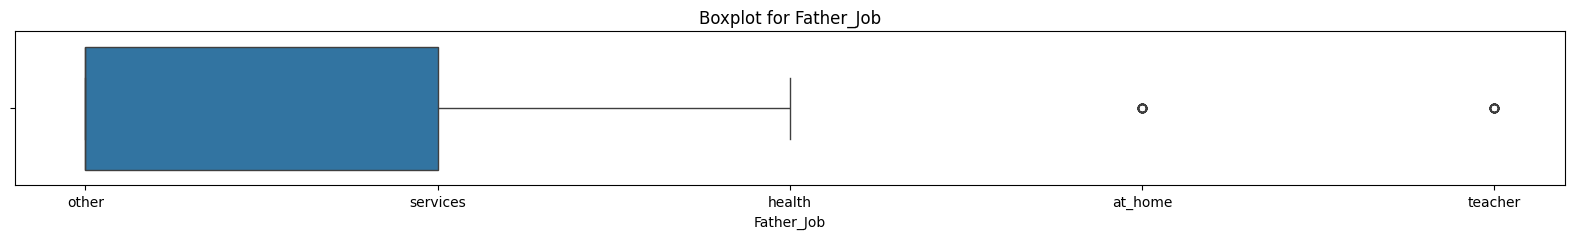

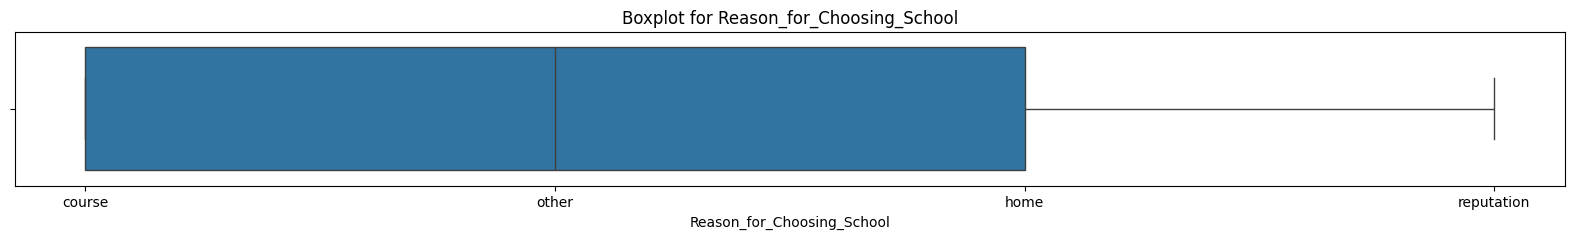

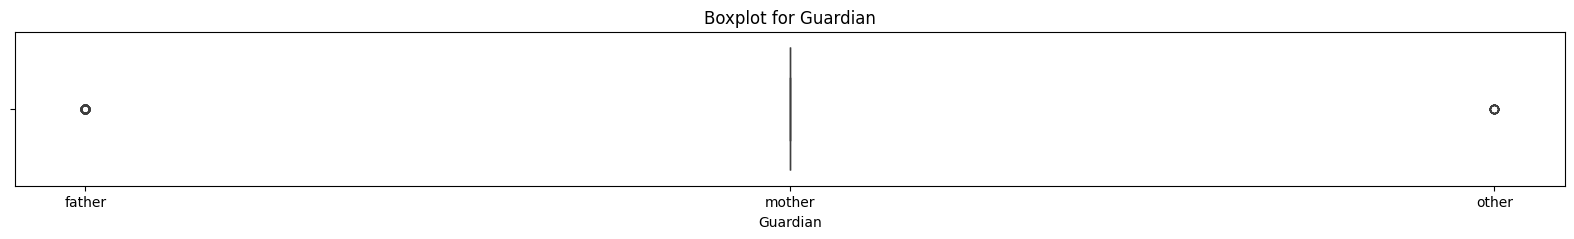

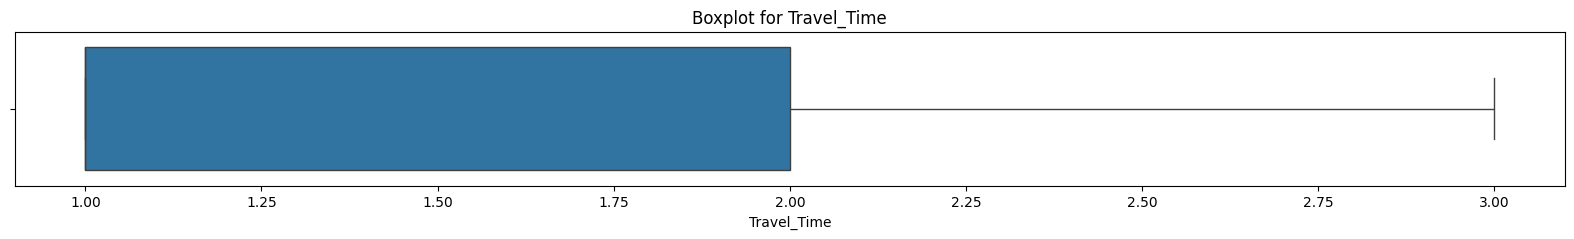

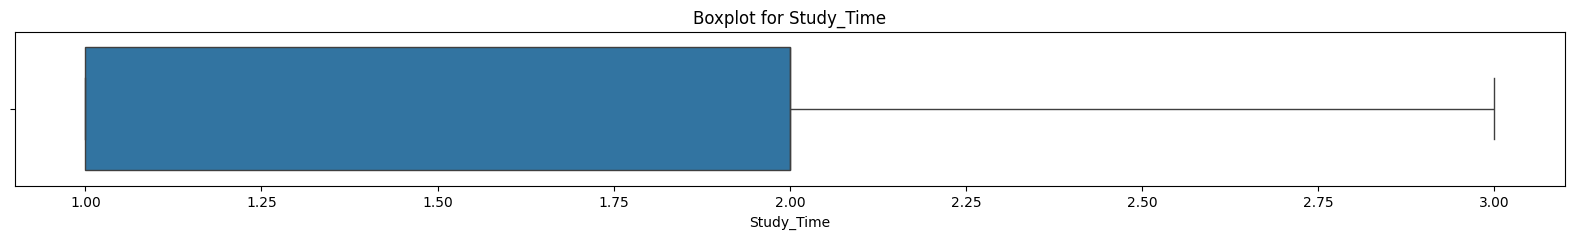

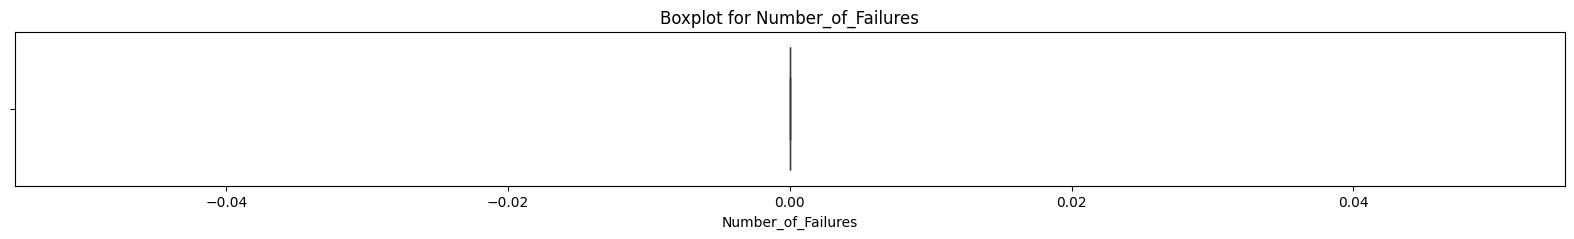

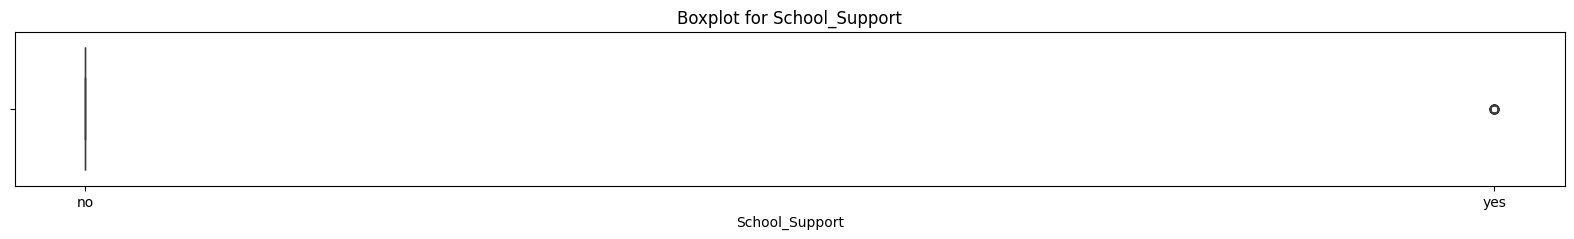

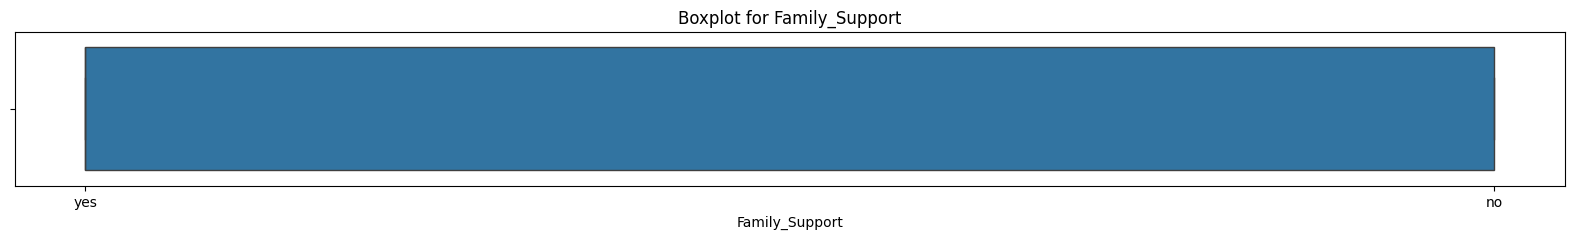

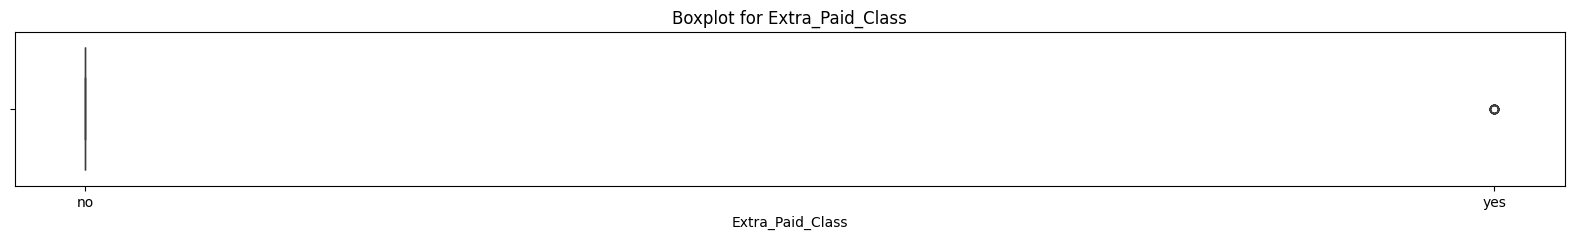

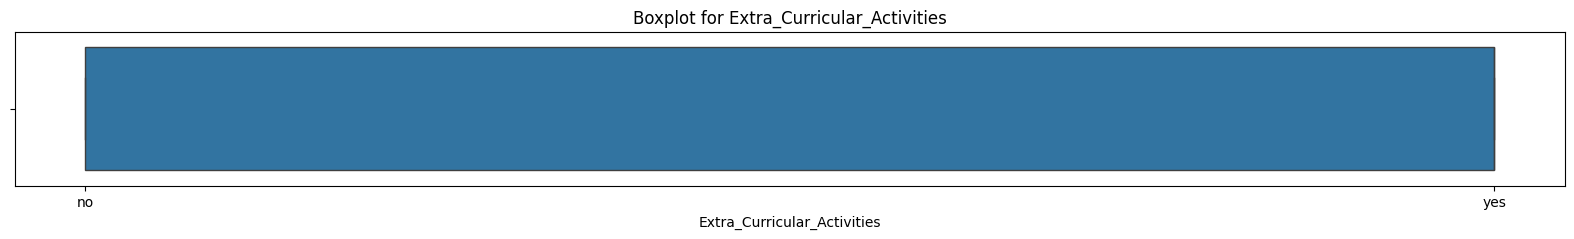

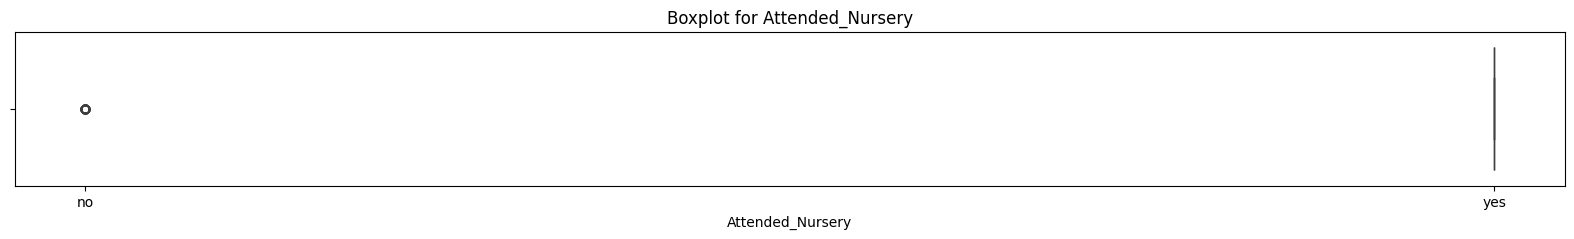

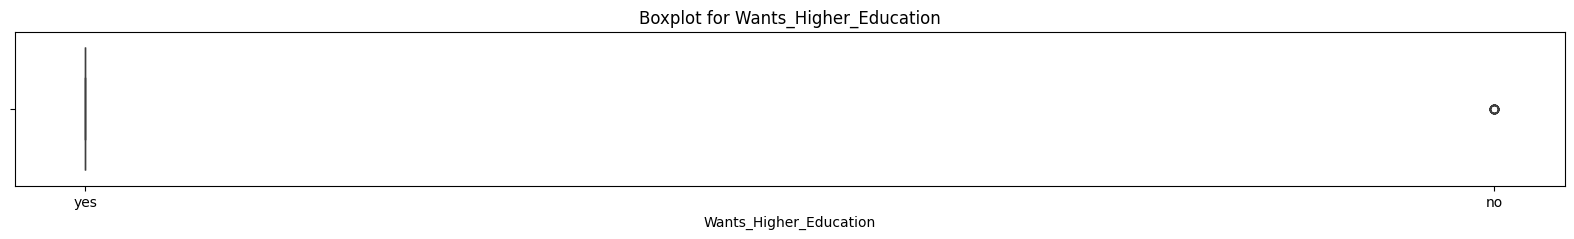

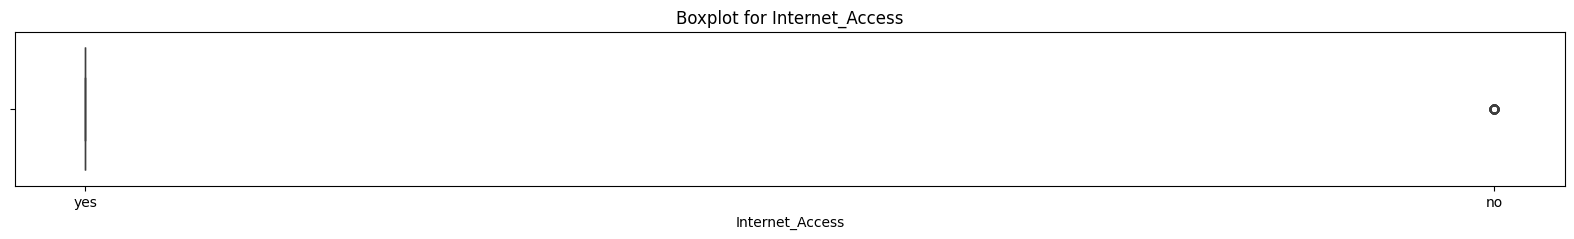

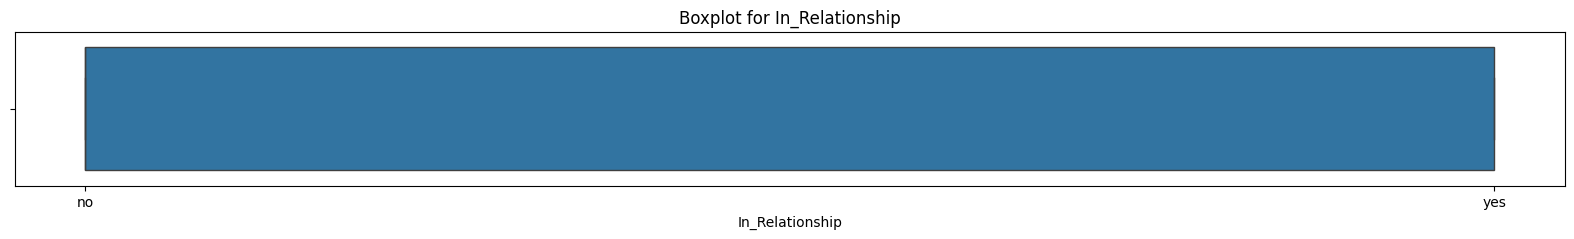

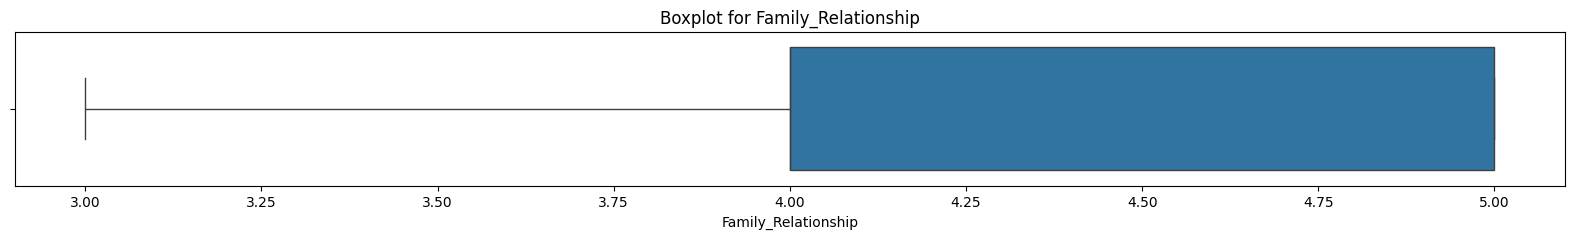

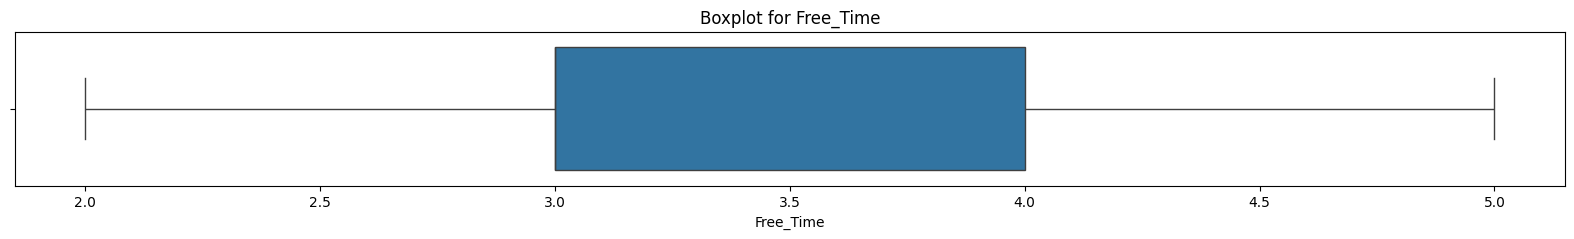

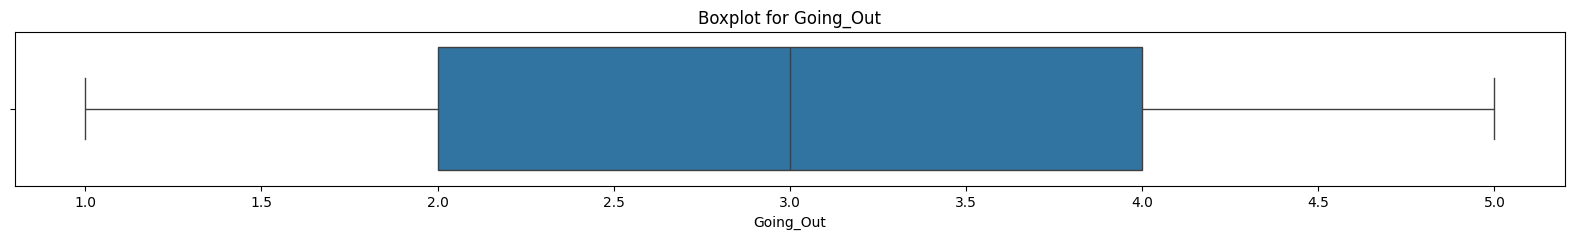

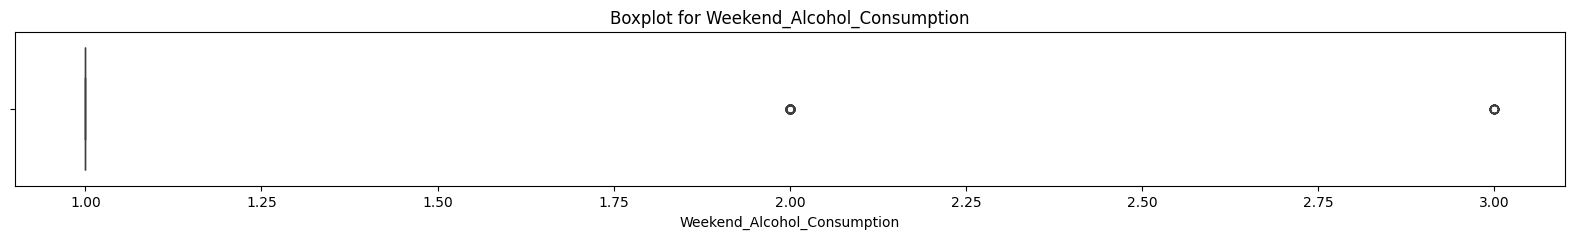

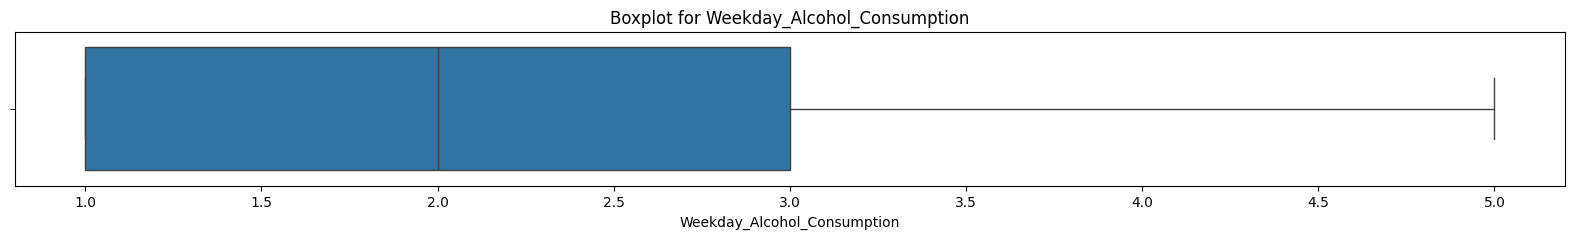

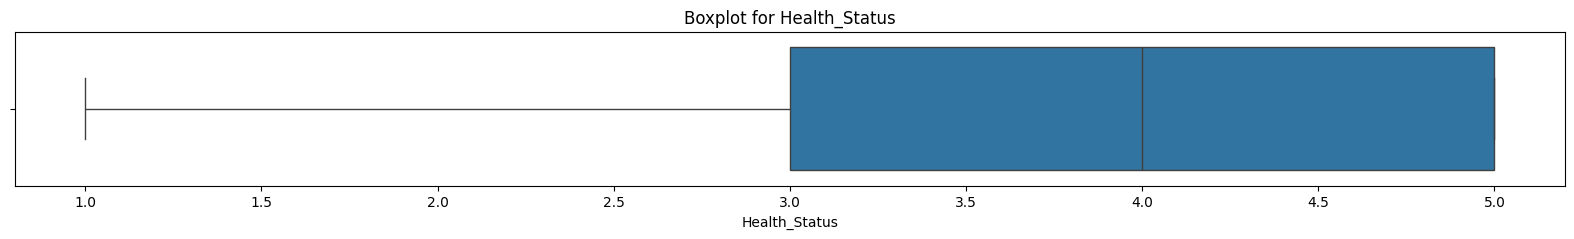

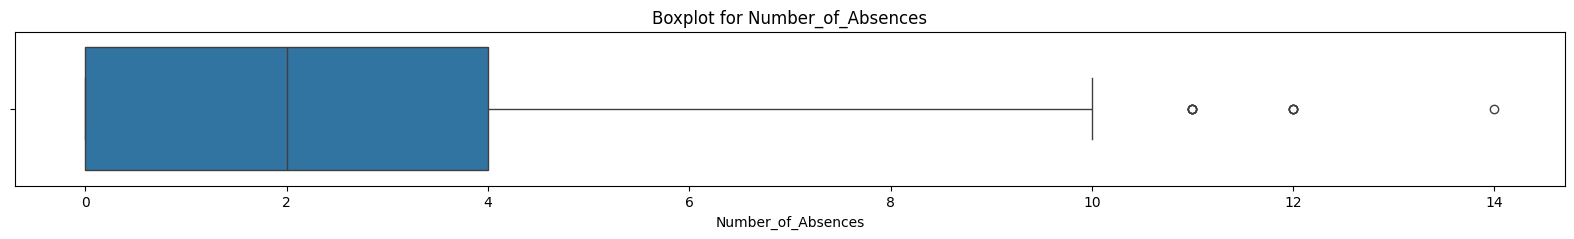

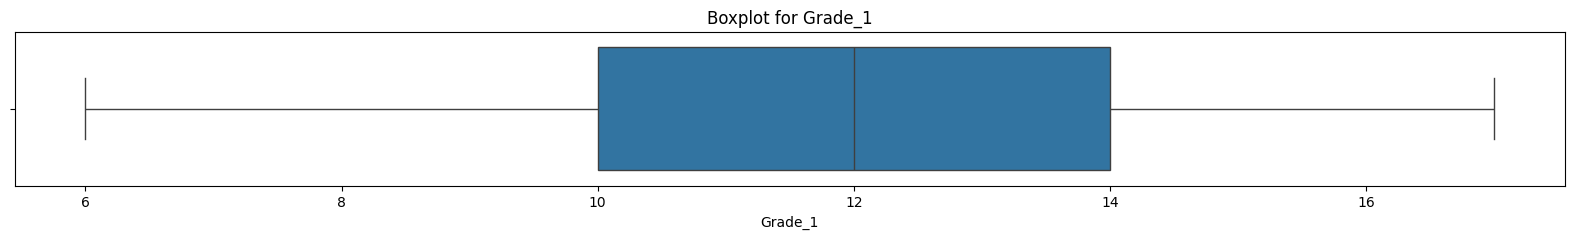

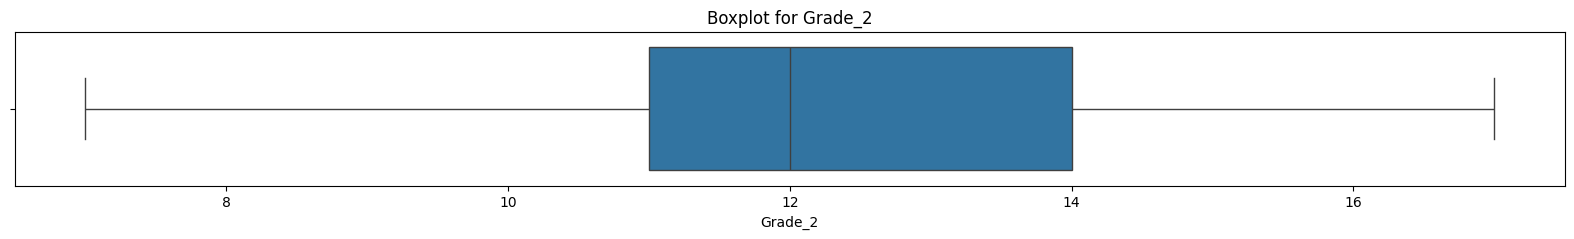

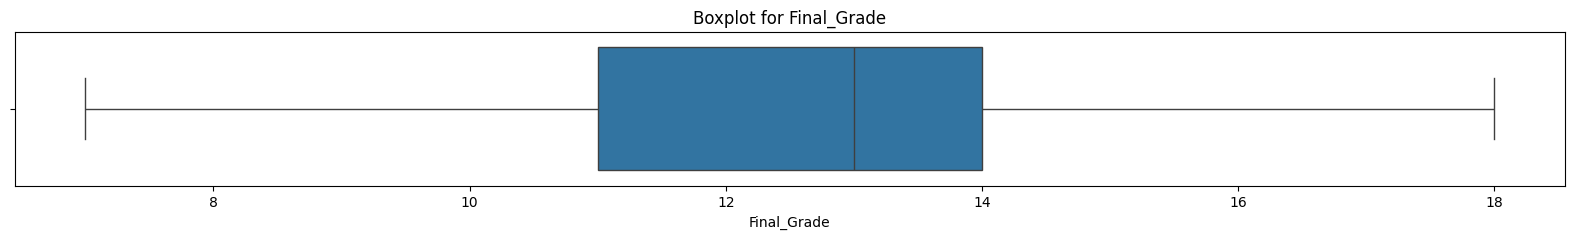

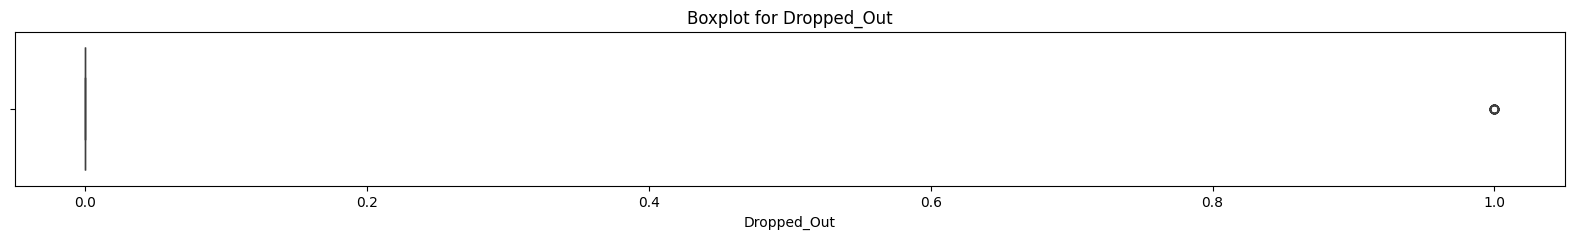

In [25]:
# Mengecek outliers untuk setiap kolom numerik
for column in df_noid_outlier_clean.columns:
    plt.figure(figsize=(20, 2))
    sns.boxplot(data=df_noid_outlier_clean, x=column)
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

In [26]:
df_noid_outlier_clean.select_dtypes(exclude=["object", "bool"]).max()

Age                            20
Mother_Education                4
Father_Education                4
Travel_Time                     3
Study_Time                      3
Number_of_Failures              0
Family_Relationship             5
Free_Time                       5
Going_Out                       5
Weekend_Alcohol_Consumption     3
Weekday_Alcohol_Consumption     5
Health_Status                   5
Number_of_Absences             14
Grade_1                        17
Grade_2                        17
Final_Grade                    18
dtype: int64

In [27]:
# Lanjutan pengecekan karna walau berkurang, masih ada outlier
q1 = df_noid_outlier_clean[['Age', 'Father_Education', 'Number_of_Absences']].quantile(0.25)
q3 = df_noid_outlier_clean[['Age', 'Father_Education', 'Number_of_Absences']].quantile(0.75)
iqr = q3 - q1
iqr

Age                   1.0
Father_Education      1.0
Number_of_Absences    4.0
dtype: float64

In [28]:
batas_atas = q3 + 1.5 * iqr
batas_atas

Age                   18.5
Father_Education       4.5
Number_of_Absences    10.0
dtype: float64

In [29]:
jml_outliers = (df_noid_outlier_clean[['Age', 'Father_Education', 'Number_of_Absences']] > batas_atas).sum()
print(jml_outliers)

Age                    9
Father_Education       0
Number_of_Absences    10
dtype: int64


In [30]:
persentase_outliers = jml_outliers / df_noid_outlier_clean.shape[0] * 100
print(persentase_outliers)

Age                   2.290076
Father_Education      0.000000
Number_of_Absences    2.544529
dtype: float64


In [31]:
### Scaling
import pandas as pd

# Melakukan standardisasi secara manual untuk kolom numerikal (Time & Length)
from sklearn.preprocessing import StandardScaler

# Memilih kolom numerikal untuk di-scale
columns_to_scale = ['Travel_Time', 'Study_Time', 'Free_Time', 'Grade_1', 'Grade_2', 'Final_Grade']

# Menginisialisasi scaler
scaler = StandardScaler()

# Melakukan standarisasi
data = df[columns_to_scale].copy()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Menampilkan hasil
print(data.head())


   Travel_Time  Study_Time  Free_Time   Grade_1   Grade_2  Final_Grade
0     0.576718    0.083653  -0.171647 -4.155470 -0.195820    -0.280658
1    -0.760032    0.083653  -0.171647 -0.874570 -0.195820    -0.280658
2    -0.760032    0.083653  -0.171647  0.219064  0.491137     0.029116
3    -0.760032    1.290114  -1.123771  0.948153  0.834615     0.648663
4    -0.760032    0.083653  -0.171647 -0.145481  0.491137     0.338889


In [32]:
# Menghitung rata-rata dari setiap kolom
means = data.mean(axis=0) # Menghitung rata-rata per kolom.
means

Travel_Time   -7.663789e-17
Study_Time     9.579736e-17
Free_Time      1.861206e-16
Grade_1        2.846550e-16
Grade_2       -2.189654e-17
Final_Grade    1.094827e-17
dtype: float64

In [33]:
std = data.std(axis=0) # Menghitung standar deviasi per kolom
std

Travel_Time    1.000771
Study_Time     1.000771
Free_Time      1.000771
Grade_1        1.000771
Grade_2        1.000771
Final_Grade    1.000771
dtype: float64

In [34]:
# Melakukan standardisasi Manual
standarisation_scaled = (data - means) / std

In [35]:
from sklearn.preprocessing import StandardScaler

# Memilih kolom yang ingin di-scale
columns_to_scale = ['Travel_Time', 'Study_Time', 'Free_Time', 'Grade_1', 'Grade_2', 'Final_Grade']

# Menginisialisasi scaler
scaler = StandardScaler()

# Melakukan standarisasi
df_scaled = df[columns_to_scale].copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

# Mengganti kolom di DataFrame asli dengan data yang telah di-standardisasi
df[columns_to_scale] = df_scaled[columns_to_scale]

# Menampilkan hasil
print(df.head())


  School Gender  Age Address Family_Size Parental_Status  Mother_Education  \
0     GP      F   18       U         GT3               A                 4   
1     GP      F   17       U         GT3               T                 1   
2     GP      F   15       U         LE3               T                 1   
3     GP      F   15       U         GT3               T                 4   
4     GP      F   16       U         GT3               T                 3   

   Father_Education Mother_Job Father_Job  ... Free_Time Going_Out  \
0                 4    at_home    teacher  ... -0.171647         4   
1                 1    at_home      other  ... -0.171647         3   
2                 1    at_home      other  ... -0.171647         2   
3                 2     health   services  ... -1.123771         2   
4                 3      other      other  ... -0.171647         2   

   Weekend_Alcohol_Consumption  Weekday_Alcohol_Consumption  Health_Status  \
0                            1  

In [36]:
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,-0.171647,4,1,1,3,4,-4.155470,-0.195820,-0.280658,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,-0.171647,3,1,1,3,2,-0.874570,-0.195820,-0.280658,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,-0.171647,2,2,3,3,6,0.219064,0.491137,0.029116,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,-1.123771,2,1,1,5,0,0.948153,0.834615,0.648663,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,-0.171647,2,1,2,5,0,-0.145481,0.491137,0.338889,False


In [37]:
#Scalling : Normalisasi MinMax Scalling Manual
# Melakukan normalisasi secara manual untuk kolom numerikal (Time & Length)
data = df[['Travel_Time', 'Study_Time', 'Free_Time', 'Grade_1', 'Grade_2', 'Final_Grade']]
means = data.mean(axis=0)
max_min = data.max(axis=0) - data.min(axis=0)
max_min

Travel_Time    4.010250
Study_Time     3.619384
Free_Time      3.808499
Grade_1        6.926346
Grade_2        6.526085
Final_Grade    5.885694
dtype: float64

In [38]:
max_min_scaled = (data - data.min(axis=0)) / max_min
df[['Travel_Time', 'Study_Time', 'Free_Time', 'Grade_1', 'Grade_2', 'Final_Grade']] = max_min_scaled
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0.50,4,1,1,3,4,0.000000,0.578947,0.578947,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0.50,3,1,1,3,2,0.473684,0.578947,0.578947,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0.50,2,2,3,3,6,0.631579,0.684211,0.631579,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,0.25,2,1,1,5,0,0.736842,0.736842,0.736842,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,0.50,2,1,2,5,0,0.578947,0.684211,0.684211,False


In [39]:
# Mengevaluasi Hasil Scaling
from sklearn import preprocessing
numerical_col = df.select_dtypes(exclude=['object','bool']).columns.tolist()
numerical_col = numerical_col[1:-2]
numerical_col

['Mother_Education',
 'Father_Education',
 'Travel_Time',
 'Study_Time',
 'Number_of_Failures',
 'Family_Relationship',
 'Free_Time',
 'Going_Out',
 'Weekend_Alcohol_Consumption',
 'Weekday_Alcohol_Consumption',
 'Health_Status',
 'Number_of_Absences',
 'Grade_1']

In [40]:
# StandardScaler
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df[numerical_col])
standard_df = pd.DataFrame(standard_df, columns = numerical_col)
standard_df.head()

,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1
0,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-4.155470
1,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.874570
2,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.219064
3,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.948153
4,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,-0.145481


In [41]:
# Normalisasi/MinMax Scaler
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df[numerical_col])
minmax_df = pd.DataFrame(minmax_df, columns = numerical_col)
minmax_df.head()

,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1
0,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.1250,0.000000
1,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.0625,0.473684
2,0.25,0.25,0.000000,0.333333,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.1875,0.631579
3,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,0.00,1.0,0.0000,0.736842
4,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.0000,0.578947


In [42]:
# Robust Scaling
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df[numerical_col])
robust_df = pd.DataFrame(robust_df, columns = numerical_col)
robust_df.head()

,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,-0.5,-0.333333,0.333333,-3.666667
1,-0.5,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.5,-0.333333,0.000000,-0.666667
2,-0.5,-0.5,0.0,0.0,0.0,0.0,0.0,-0.5,1.0,0.5,-0.333333,0.666667,0.333333
3,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-0.5,0.0,-0.5,0.333333,-0.333333,1.000000
4,0.5,0.5,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.333333,-0.333333,0.000000


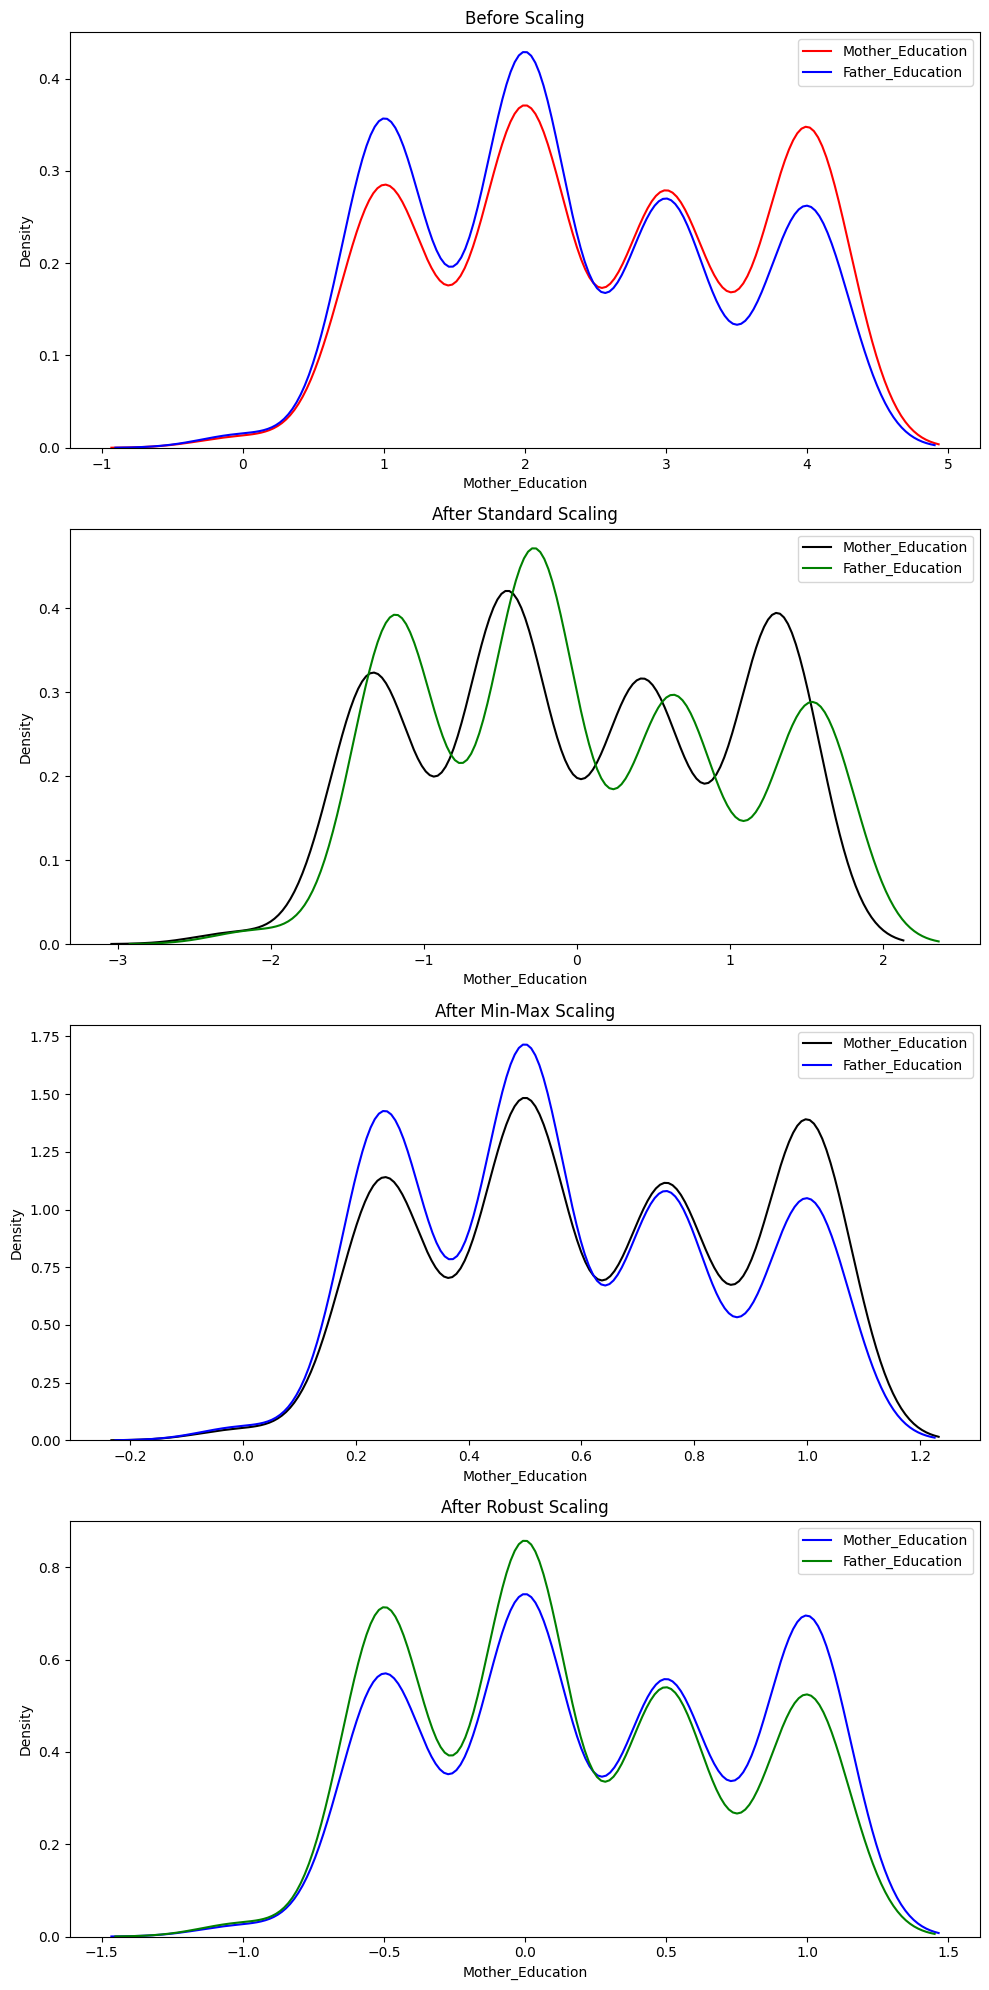

In [43]:
fig, axes = plt.subplots(nrows=4, figsize=(10, 20))

axes[0].set_title('Before Scaling')
sns.kdeplot(df[numerical_col[0]], ax=axes[0], color='r', label=numerical_col[0])
sns.kdeplot(df[numerical_col[1]], ax=axes[0], color='b', label=numerical_col[1])
axes[0].legend()

axes[1].set_title('After Standard Scaling')
sns.kdeplot(standard_df[numerical_col[0]], ax=axes[1], color='black', label=numerical_col[0])
sns.kdeplot(standard_df[numerical_col[1]], ax=axes[1], color='g', label=numerical_col[1])
axes[1].legend()

axes[2].set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df[numerical_col[0]], ax=axes[2], color='black', label=numerical_col[0])
sns.kdeplot(minmax_df[numerical_col[1]], ax=axes[2], color='b', label=numerical_col[1])
axes[2].legend()

axes[3].set_title('After Robust Scaling')
sns.kdeplot(robust_df[numerical_col[0]], ax=axes[3], color='blue', label=numerical_col[0])
sns.kdeplot(robust_df[numerical_col[1]], ax=axes[3], color='green', label=numerical_col[1])
axes[3].legend()

plt.tight_layout()
plt.show()


In [44]:
import numpy as np

# CV before scaling
cv_before_scaling = np.std(df[numerical_col]) / df[numerical_col].mean(axis=0)

# CV after scaling
cv_standard = np.std(standard_df[numerical_col]) / df[numerical_col].mean(axis=0)
cv_minmax = np.std(minmax_df[numerical_col]) / df[numerical_col].mean(axis=0)
cv_robust = np.std(robust_df[numerical_col]) / df[numerical_col].mean(axis=0)

print('CV Before Scaling:\n', cv_before_scaling)
print('-'*70)
print('CV After Standard Scaling:\n', cv_standard)
print('-'*70)
print('CV After Min-Max Scaling:\n', cv_minmax)
print('-'*70)
print('CV After Robust Scaling:\n', cv_robust)

CV Before Scaling:
 Mother_Education               0.450831
Father_Education               0.476490
Travel_Time                    1.315734
Study_Time                     0.890624
Number_of_Failures             2.671617
Family_Relationship            0.242957
Free_Time                      0.481720
Going_Out                      0.368884
Weekend_Alcohol_Consumption    0.615133
Weekday_Alcohol_Consumption    0.562784
Health_Status                  0.408670
Number_of_Absences             1.267171
Grade_1                        0.240647
dtype: float64
----------------------------------------------------------------------
CV After Standard Scaling:
 Mother_Education               0.397672
Father_Education               0.433534
Travel_Time                    5.276423
Study_Time                     3.223510
Number_of_Failures             4.506944
Family_Relationship            0.254410
Free_Time                      1.834629
Going_Out                      0.313982
Weekend_Alcohol_Consumptio

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=ax

### Label Encoding

In [45]:
# Label Encoding
import pandas as pd
from sklearn import preprocessing

# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = [
    'School', 
    'Gender', 
    'Address', 
    'Family_Size', 
    'Parental_Status', 
    'Mother_Job', 
    'Father_Job', 
    'Reason_for_Choosing_School', 
    'Guardian', 
    'School_Support', 
    'Family_Support', 
    'Extra_Paid_Class', 
    'Extra_Curricular_Activities', 
    'Attended_Nursery', 
    'Wants_Higher_Education', 
    'Internet_Access', 
    'In_Relationship'
]

# Inisialisasi LabelEncoder
le = preprocessing.LabelEncoder()

# Melakukan encoding pada kolom kategori
df[cat_col] = df[cat_col].apply(le.fit_transform)

# Menampilkan hasil
print(df.head())


   School  Gender  Age  Address  Family_Size  Parental_Status  \
0       0       0   18        1            0                0   
1       0       0   17        1            0                1   
2       0       0   15        1            1                1   
3       0       0   15        1            0                1   
4       0       0   16        1            0                1   

   Mother_Education  Father_Education  Mother_Job  Father_Job  ...  Free_Time  \
0                 4                 4           0           4  ...       0.50   
1                 1                 1           0           2  ...       0.50   
2                 1                 1           0           2  ...       0.50   
3                 4                 2           1           3  ...       0.25   
4                 3                 3           2           2  ...       0.50   

   Going_Out  Weekend_Alcohol_Consumption  Weekday_Alcohol_Consumption  \
0          4                            1       

## Modeling

In [46]:
df_Linear = df.copy()
df_Logistic = df.copy()
df_knn = df.copy()

### LOGISTIC REGRESSION

In [47]:
df_Linear

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,0,0,18,1,0,0,4,4,0,4,...,0.50,4,1,1,3,4,0.000000,0.578947,0.578947,False
1,0,0,17,1,0,1,1,1,0,2,...,0.50,3,1,1,3,2,0.473684,0.578947,0.578947,False
2,0,0,15,1,1,1,1,1,0,2,...,0.50,2,2,3,3,6,0.631579,0.684211,0.631579,False
3,0,0,15,1,0,1,4,2,1,3,...,0.25,2,1,1,5,0,0.736842,0.736842,0.736842,False
4,0,0,16,1,0,1,3,3,2,2,...,0.50,2,1,2,5,0,0.578947,0.684211,0.684211,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,0.75,2,1,2,5,4,0.526316,0.578947,0.526316,False
645,1,0,18,1,1,1,3,1,4,3,...,0.50,4,1,1,1,4,0.789474,0.789474,0.842105,False
646,1,0,18,1,0,1,1,1,2,2,...,0.00,1,1,1,5,6,0.578947,0.631579,0.473684,True
647,1,1,17,1,1,1,3,1,3,3,...,0.75,5,3,4,2,6,0.526316,0.526316,0.526316,False


In [48]:
# Import Library
import pandas as pd

# Menghapus kolom ke-5
df_Linear = df_Linear.drop(df_Linear.columns[5], axis=1)

# Menampilkan 3 baris pertama dari DataFrame setelah penghapusan
df_Linear.head(3)


,School,Gender,Age,Address,Family_Size,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,0,0,18,1,0,4,4,0,4,0,...,0.5,4,1,1,3,4,0.000000,0.578947,0.578947,False
1,0,0,17,1,0,1,1,0,2,0,...,0.5,3,1,1,3,2,0.473684,0.578947,0.578947,False
2,0,0,15,1,1,1,1,0,2,2,...,0.5,2,2,3,3,6,0.631579,0.684211,0.631579,False


In [56]:
# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Gender','Parental_Status','School','Address','Family_Size','Parental_Status','Guardian','School_Support','Family_Support','Extra_Paid_Class','Extra_Curricular_Activities',
          'Attended_Nursery','Wants_Higher_Education','Internet_Access','In_Relationship','Dropped_Out']
df_Linear.head()

,School,Gender,Age,Address,Family_Size,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,0,0,18,1,0,4,4,0,4,0,...,0.50,4,1,1,3,4,0.000000,0.578947,0.578947,False
1,0,0,17,1,0,1,1,0,2,0,...,0.50,3,1,1,3,2,0.473684,0.578947,0.578947,False
2,0,0,15,1,1,1,1,0,2,2,...,0.50,2,2,3,3,6,0.631579,0.684211,0.631579,False
3,0,0,15,1,0,4,2,1,3,1,...,0.25,2,1,1,5,0,0.736842,0.736842,0.736842,False
4,0,0,16,1,0,3,3,2,2,1,...,0.50,2,1,2,5,0,0.578947,0.684211,0.684211,False


In [57]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df_Linear.iloc[:,0:-1].values
y = df_Linear.iloc[:,-1].values

# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

# Membuat Model - LogisticRegression
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(solver='lbfgs', max_iter=1000)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Membuat Confusion Matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[160,   5],
       [ 13,  17]])

Text(0.5, 427.9555555555555, 'Predicted label')

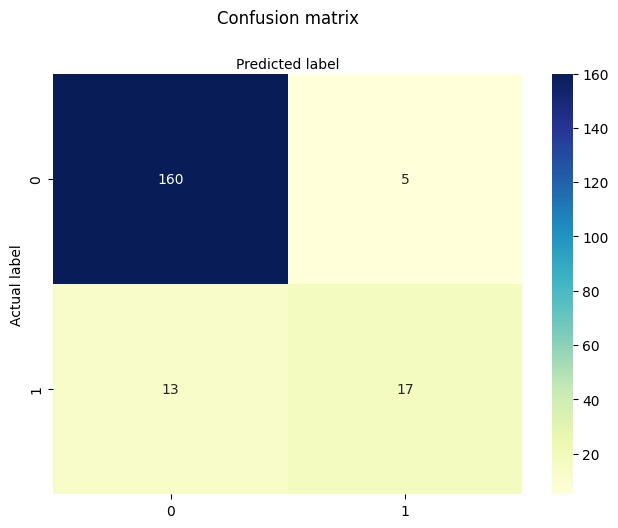

In [58]:
# Visualisasi Confusion Matrix dengan Heatmap

# Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # Label kelas yang akan ditampilkan pada sumbu x dan y
fig, ax = plt.subplots() #Membuat objek gambar dan sumbu menggunakan
tick_marks = np.arange(len(class_names)) # Membuat array dengan rentang jumlah kelas yang ada

# Menentukan tanda-tanda pada sumbu x dan y sesuai dengan array yang telah dibuat
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Membuat Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix) #Parameter yang akan divisualisasi
            , annot=True # Menampilkan nilai di dalam kotak heatmap
            , cmap="YlGnBu" # Skema warna pada heatmap, "YlGnBu" adalah kombinasi antara Yellow (Kuning), Green (Hijau), dan Blue (Biru).
            ,fmt='g') #Mengatur format angka menjadi notasi umum (general notation)

# Mengatur posisi label sumbu x ke bagian atas heatmap
ax.xaxis.set_label_position("top")

# Mengatur tampilan grafik agar lebih rapi.
plt.tight_layout()

# Mengatur judul grafik, label pada sumbu y dan x
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
# Import library
from sklearn.metrics import classification_report

# Mendefinisikan nama kelas dalam array
target_names = ['Not Delayed', 'Delayed']

print(classification_report(y_test # Array target yang berisi label aktual
                            , y_pred # Array target yang berisi label prediksi
                            , target_names=target_names)) #Memberikan nama kelas yang akan ditampilkan

              precision    recall  f1-score   support

 Not Delayed       0.92      0.97      0.95       165
     Delayed       0.77      0.57      0.65        30

    accuracy                           0.91       195
   macro avg       0.85      0.77      0.80       195
weighted avg       0.90      0.91      0.90       195



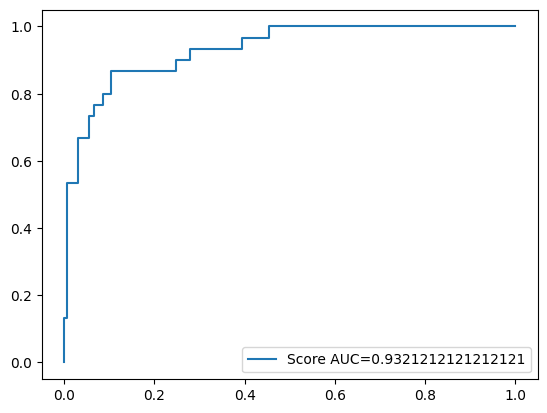

In [60]:
import matplotlib.pyplot as plt
# Memperoleh probabilitas prediksi kelas positif (y=1) dari model klasifikasi reg untuk data uji (X_test)
y_pred_proba = reg.predict_proba(X_test)[::,1]

# Menghitung false positive rate (fpr), true positive rate (tpr), dan threshold yang terkait dengan kurva ROC.
fpr, tpr, _ = metrics.roc_curve(y_test, #Label aktual
                                y_pred_proba)

# Menghitung nilai AUC dari kurva ROC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Membuat plot untuk kurva ROC
plt.plot(fpr,tpr
         ,label="Score AUC="+str(auc)) #Label "Score AUC" ditambahkan ke legenda untuk menampilkan nilai AUC di grafik

# Menampilkan legenda di lokasi keempat (kanan bawah) pada grafik
plt.legend(loc=4)

# Menampilkan grafik
plt.show()

### LINEAR REGRESSION

In [61]:
df_Linear

,School,Gender,Age,Address,Family_Size,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,0,0,18,1,0,4,4,0,4,0,...,0.50,4,1,1,3,4,0.000000,0.578947,0.578947,False
1,0,0,17,1,0,1,1,0,2,0,...,0.50,3,1,1,3,2,0.473684,0.578947,0.578947,False
2,0,0,15,1,1,1,1,0,2,2,...,0.50,2,2,3,3,6,0.631579,0.684211,0.631579,False
3,0,0,15,1,0,4,2,1,3,1,...,0.25,2,1,1,5,0,0.736842,0.736842,0.736842,False
4,0,0,16,1,0,3,3,2,2,1,...,0.50,2,1,2,5,0,0.578947,0.684211,0.684211,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,2,3,3,2,0,...,0.75,2,1,2,5,4,0.526316,0.578947,0.526316,False
645,1,0,18,1,1,3,1,4,3,0,...,0.50,4,1,1,1,4,0.789474,0.789474,0.842105,False
646,1,0,18,1,0,1,1,2,2,0,...,0.00,1,1,1,5,6,0.578947,0.631579,0.473684,True
647,1,1,17,1,1,3,1,3,3,0,...,0.75,5,3,4,2,6,0.526316,0.526316,0.526316,False


In [62]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df_Linear[['Grade_1']]
y = df_Linear['Final_Grade']

In [63]:
# Membagi dataset ke data latih dan data uji

# Import fungsi train_test_split untuk membagi data dari libray sklearn dan modul model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [64]:
# Memanggil fungsi LinearRegression
from sklearn.linear_model import LinearRegression
# Memanggil objek LinearRegression ke dalam variabel mlr
lr = LinearRegression()

# Melatih model
lr.fit(X_train, y_train)

# Memprediksi model
y_pred_lr = lr.predict(X_test)
# Nilai prediksi
print("Prediction for test set: {}".format(y_pred_lr))

Prediction for test set: [0.50056538 0.75989713 0.81176348 0.55243173 0.50056538 0.70803078
 0.81176348 0.91549617 0.60429808 0.65616443 0.65616443 0.60429808
 0.70803078 0.44869903 0.91549617 0.65616443 0.75989713 0.65616443
 0.60429808 0.55243173 0.70803078 0.50056538 0.86362983 0.65616443
 0.60429808 0.29309999 0.65616443 0.65616443 0.60429808 0.60429808
 0.75989713 0.91549617 0.60429808 0.75989713 0.65616443 0.44869903
 0.60429808 0.60429808 0.70803078 0.55243173 0.81176348 0.86362983
 0.60429808 0.65616443 0.60429808 0.60429808 0.70803078 0.50056538
 0.60429808 0.39683269 0.39683269 0.81176348 0.55243173 0.60429808
 0.34496634 0.55243173 0.65616443 0.55243173 0.70803078 0.75989713
 0.55243173 0.44869903 0.55243173 0.44869903 0.65616443 0.70803078
 0.65616443 0.70803078 0.75989713 0.44869903 0.34496634 0.60429808
 0.70803078 0.55243173 0.70803078 0.75989713 0.75989713 0.65616443
 0.75989713 0.50056538 0.75989713 0.60429808 0.50056538 0.70803078
 0.96736252 0.60429808 0.60429808 0.7

In [65]:
# Membandingkan nilai sebenarnya dengan nilai prediksi menggunakan linear regression
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
lr_diff.head()

,Actual value,Predicted value
532,0.421053,0.500565
375,0.789474,0.759897
306,0.842105,0.811763
625,0.526316,0.552432
480,0.526316,0.500565


In [66]:
# Menerapkan threshold pada variabel y_pred_lr ke dalam variabel y_predict_class
y_predict_class = [1 if prob > 0.5 else 0 for prob in y_pred_lr]

In [67]:
# Import Library
from sklearn.metrics import accuracy_score

# Menghitung Akurasi
print("Accuracy:"
      , round(accuracy_score(y_test, y_predict_class), 3)) # Membulatkan nilai akurasi menjadi tiga angka di belakang koma

ValueError: Classification metrics can't handle a mix of continuous and binary targets

### KNN

In [ ]:
df_knn

In [ ]:
# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']

# Encoding Kolom Kategori
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_knn[cat_col] = df_knn[cat_col].apply(le.fit_transform)

df_knn.head()

In [ ]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df_knn.iloc[:,0:-1].values
y = df_knn.iloc[:,-1].values

In [ ]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

# Membuat Model - Import Library
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 3) # Menentukan jumlah tetangga terdekat (nearest neighbors)

# Melatih model
knn.fit(X_train, y_train)

# Melakukan validasi silang dengan membagi data pelatihan menjadi 5 lipatan (folds)
k = KFold(n_splits = 5)

# Menghitung skor akurasi untuk setiap lipatan menggunakan metode validasi silang yang telah ditentukan
score = cross_val_score(knn
                        , X_train, y_train
                        , scoring = 'accuracy' #Parameter yang ingin digunakan
                        , cv = k).mean() # cv=k -> jumlah lipatan, .mean() -> menghitung rata-rata skor akurasi

# Mencetak skor akurasi pada set data pelatihan dengan pembulatan ke 3 desimal
print("Accuracy on the training set:", round(score, 3))

In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Not Delayed', 'Delayed']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
# Membuat list kosong dalam variabel accuracy
accuracy = []

# Membuat loop dengan rentang nilai i dari 1-14 (Exclude 15)
# Loop akan menguji setiap n dari 1-14 untuk mencari n dengan akurasi yang paling tinggi

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)

    # Menyimpan skor akurasi pada setiap iterasi ke dalam list "accuracy"
    accuracy.append(accuracy_i)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Melihat akurasi dari setiap iterasi pada line chart
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Dapat dilihat dari grafik di atas bahwa akurasi paling tinggi didapatkan dengan n = 14
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {round(accuracy * 100, 2)}%")

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Memperoleh probabilitas prediksi kelas positif (y=1) dari model klasifikasi KNN untuk data uji (X_test)
y_pred_proba = knn.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Score AUC="+str(auc))
plt.legend(loc=4)
plt.show()

## Dari hasil percobaan, modeling menggunakan Algoritma KNN Memilik